# Session 1
### Simone Mistrali
#### ID:2021119

In [1]:
library("tibble")
library("ggplot2")
library("dplyr")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



# Ex. 1

## Create the dataframe

In [9]:
Loch<-c("Loch Ness","Loch Lomond","Loch Morar","Loch Tay",
        "Loch Awe","Loch Maree","Loch Ericht","Loch Lochy",
        "Loch Rannoch","Loch Shiel","Loch Katrine","Loch Arkaig",
        "Loch Shin")
Volume<-c(7.45,2.6,2.3,1.6,1.2,1.09,1.08,1.07,0.97,0.79,0.77,0.75,
          0.35)
Area<-c(56,71,27,26.4,39,28.6,18.6,16,19,19.5,12.4,16,22.5)
Length<-c(39,36,18.8,23,41,20,23,16,15.7,28,12.9,19.3,27.8)
Max_depth<-c(230,190,310,150,94,114,156,162,134,128,151,109,49)
Mean_depth<-c(132,37,87,60.6,32,38,57.6,70,51,40,43.4,46.5,15.5)
scottish.lakes<-data.frame(Loch,Volume,Area,Max_depth)
scottish.lakes

Loch,Volume,Area,Max_depth
Loch Ness,7.45,56.0,230
Loch Lomond,2.60,71.0,190
Loch Morar,2.30,27.0,310
Loch Tay,1.60,26.4,150
Loch Awe,1.20,39.0,94
Loch Maree,1.09,28.6,114
Loch Ericht,1.08,18.6,156
Loch Lochy,1.07,16.0,162
Loch Rannoch,0.97,19.0,134
Loch Shiel,0.79,19.5,128


## Evaluation of the highest and lowest volume and area lake


In [10]:
cat("The most voluminous lake in Scotland is:",as.character(scottish.lakes[scottish.lakes$Volume==max(scottish.lakes$Volume),1]),".\n")
cat("The lesser voluminous lake in Scotland is:",as.character(scottish.lakes[scottish.lakes$Volume==min(scottish.lakes$Volume),1]),".\n")
cat("The lake with most area in Scotland is:",as.character(scottish.lakes[scottish.lakes$Area==max(scottish.lakes$Area),1]),".\n")
cat("The lake with less area in Scotland is:",as.character(scottish.lakes[scottish.lakes$Area==min(scottish.lakes$Area),1]),".\n")


The most voluminous lake in Scotland is: Loch Ness .
The lesser voluminous lake in Scotland is: Loch Shin .
The lake with most area in Scotland is: Loch Lomond .
The lake with less area in Scotland is: Loch Katrine .


## Ordering dataframe per Area and print the two largest

In [11]:
scottish.lakes<-scottish.lakes[order(scottish.lakes$Area,decreasing = TRUE), ]
scottish.lakes
print(scottish.lakes[1:2,3])

,Loch,Volume,Area,Max_depth
2,Loch Lomond,2.60,71.0,190
1,Loch Ness,7.45,56.0,230
5,Loch Awe,1.20,39.0,94
6,Loch Maree,1.09,28.6,114
3,Loch Morar,2.30,27.0,310
4,Loch Tay,1.60,26.4,150
13,Loch Shin,0.35,22.5,49
10,Loch Shiel,0.79,19.5,128
9,Loch Rannoch,0.97,19.0,134
7,Loch Ericht,1.08,18.6,156


[1] 71 56


## The percentage of the scotland by water

In [13]:
area_scotland<-77933
cat("Percentage of the scotland cover by water:",sum(scottish.lakes[3])/area_scotland,'%')

Percentage of the scotland cover by water: 0.004773331 %

# Ex 2

## Download directly from google drive

In [14]:
oil <- tibble(read.table ("https://drive.google.com/u/0/uc?id=1cUQ8d0kDOw2lmzMAHIPglpdcnHy4GgF3&export=download",skip = 1,sep=",",header = T,col.names =c("Entity","Code","Year","Oil_Price") ))
head(oil)

Entity,Code,Year,Oil_Price
World,OWID_WRL,1861,0.49
World,OWID_WRL,1862,1.05
World,OWID_WRL,1863,3.15
World,OWID_WRL,1864,8.06
World,OWID_WRL,1865,6.59
World,OWID_WRL,1866,3.74


## Plot Price vs Year using standard plot

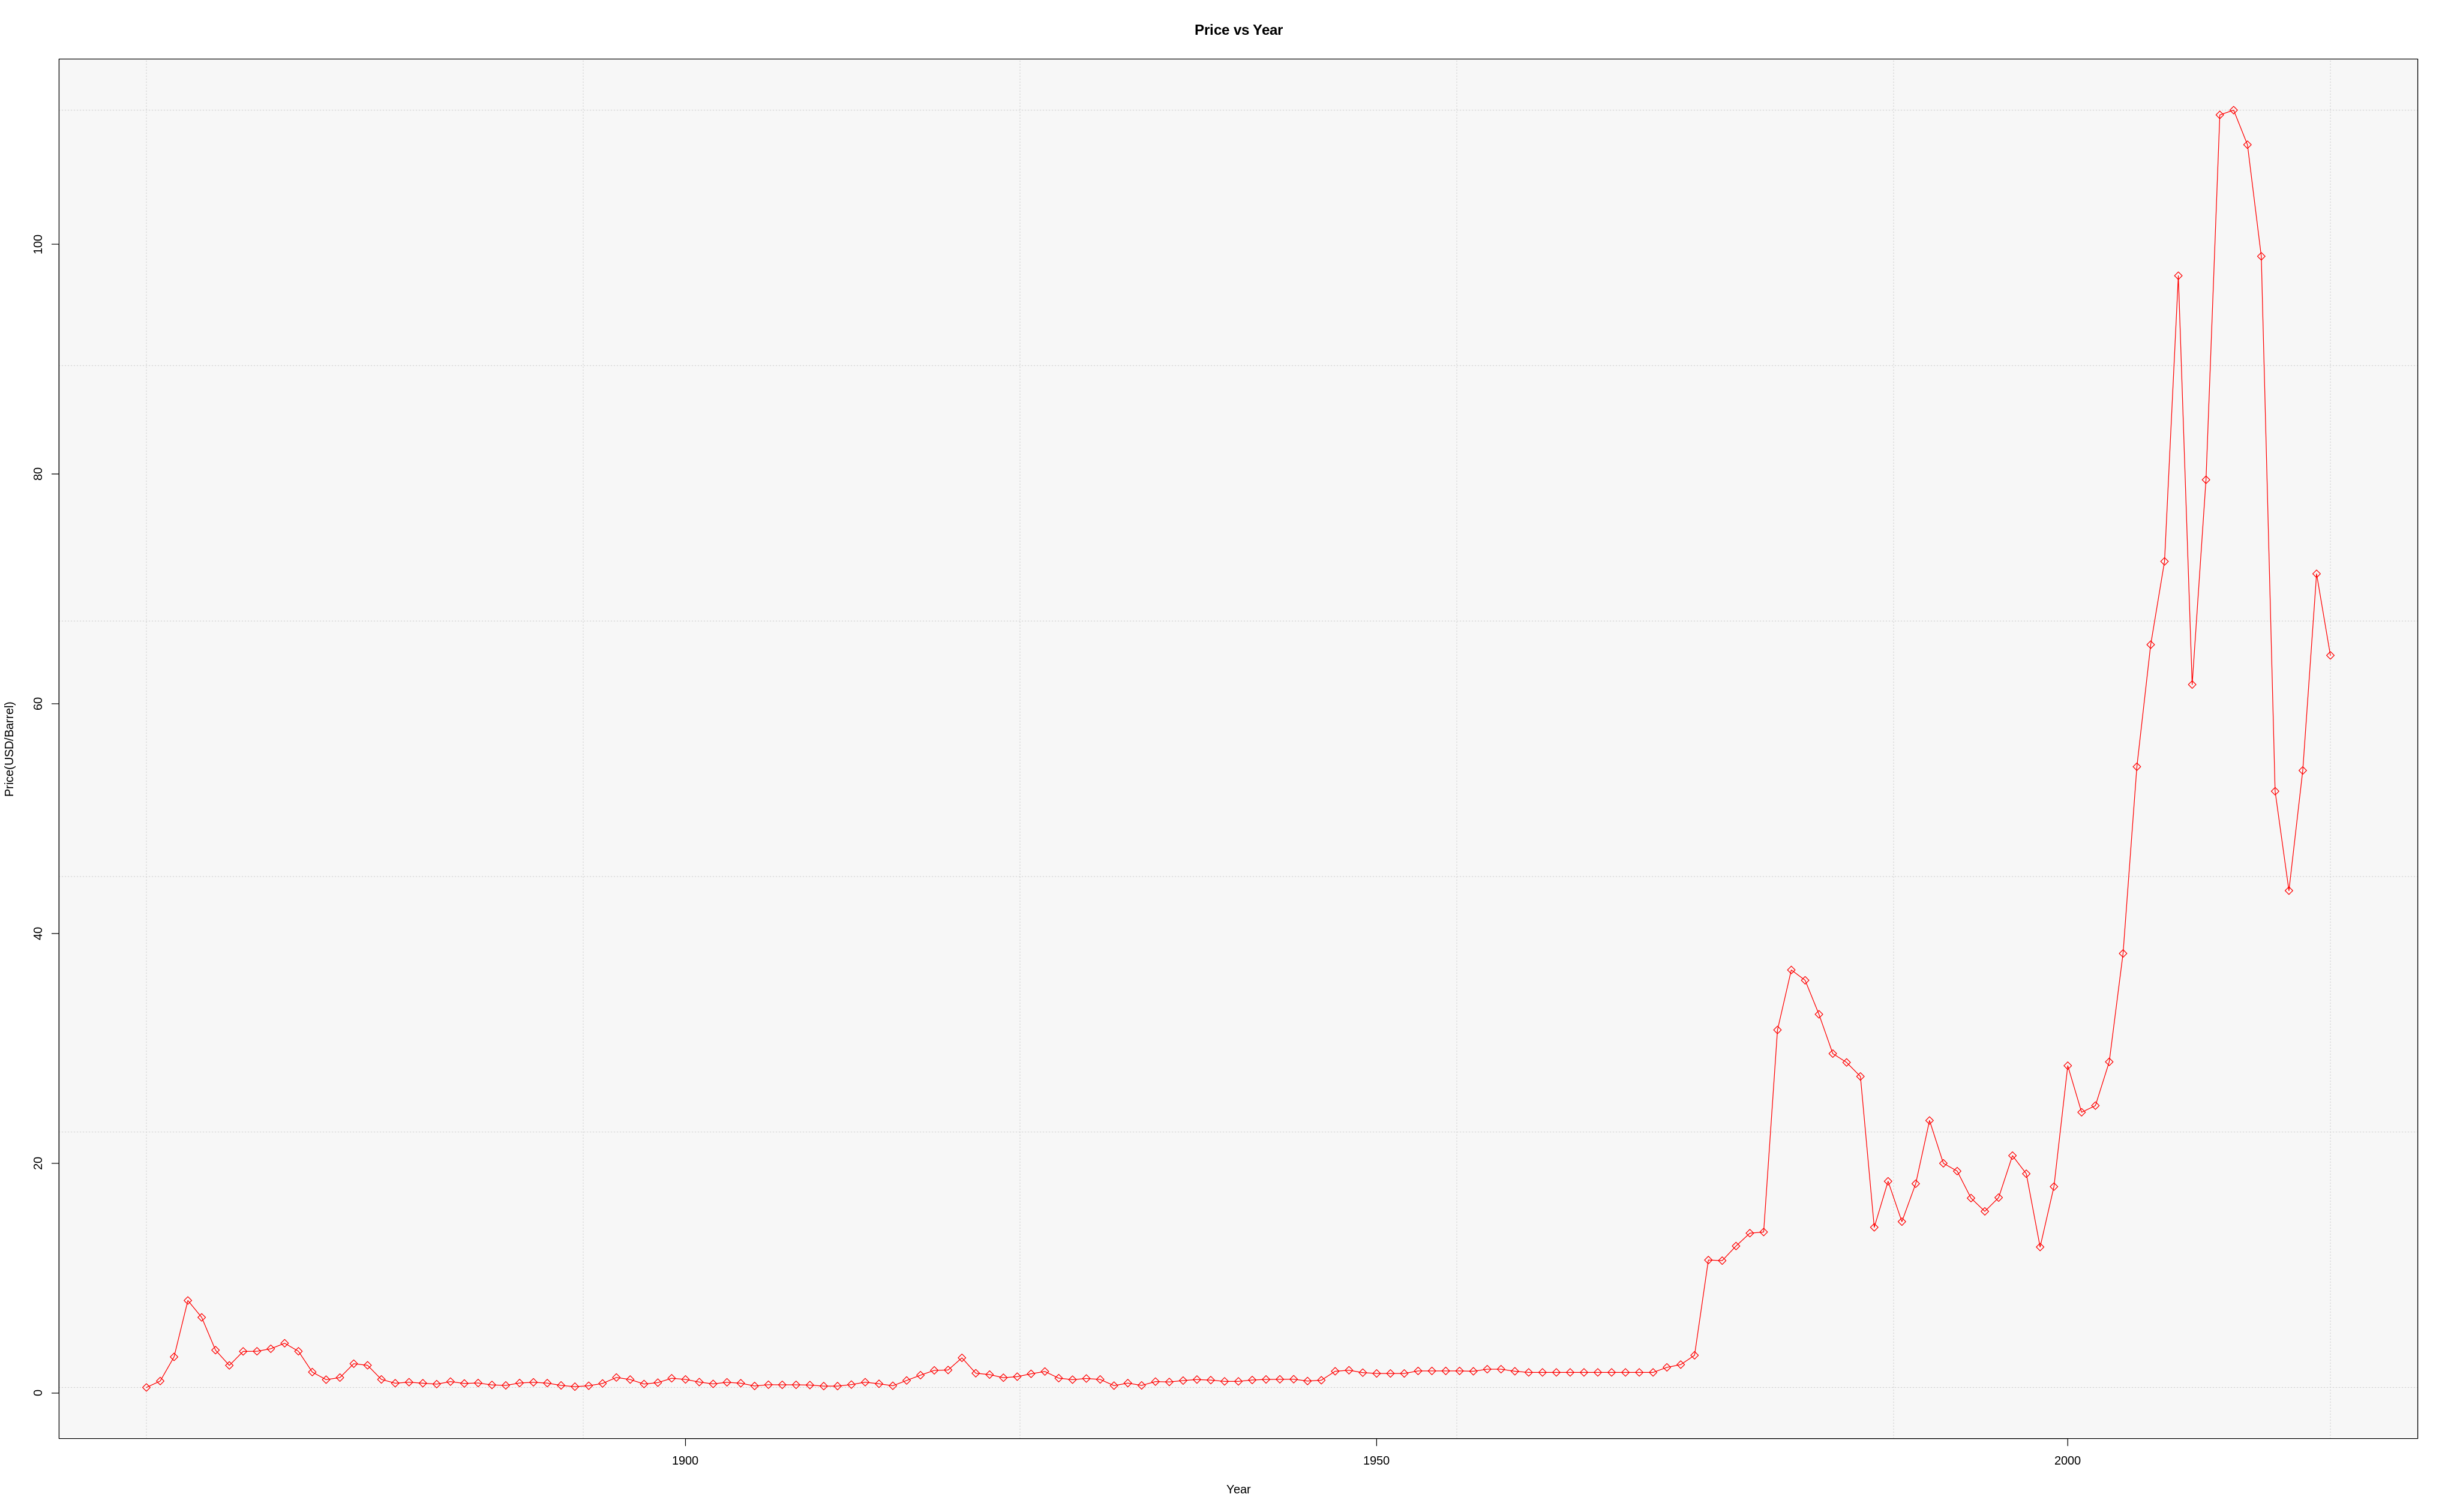

In [15]:
plot.new()

rect(par("usr")[1], par("usr")[3],
     par("usr")[2], par("usr")[4],
     col = "#f7f7f7")


grid()
par(new = TRUE)
plot(oil$Year,oil$Oil_Price,xlab = "Year",pch = 5,col="red"
     ,ylab = "Price(USD/Barrel)",type = 'o',main="Price vs Year")

In [16]:
cat("The highest price on history is :",max(oil$Oil_Price),"occurred in",as.character(oil[which.max(oil$Oil_Price),3]),".")

The highest price on history is : 111.6697 occurred in 2012 .

## Plot of the derivative of the price over the year using ggplots2

In [46]:
i <- 2: length(oil$Oil_Price)-1

derivate_price <- oil$Oil_Price[i+1]-oil$Oil_Price[i]
# derivate_price <- derivate_price[-length(derivate_price)]
df <- tibble(Year=oil$Year[-length(oil$Year)],derivate_price=derivate_price)

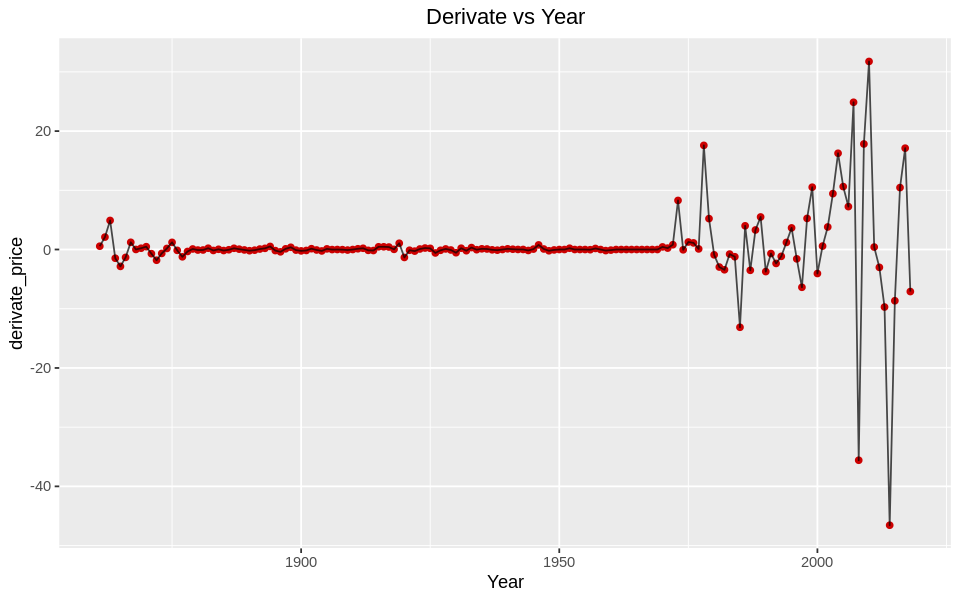

In [53]:
options(repr.plot.width = 8, repr.plot.height = 5)
plt<-ggplot(data=(df),aes(x=Year,y=derivate_price))+geom_point(colour="#CC0000")+geom_line(alpha=.7)
plt<- plt +ggtitle("Derivate vs Year") 
plt + theme(plot.title = element_text(hjust = 0.5))


# Ex 3

In [19]:
coal <- tibble(read.table ("https://drive.google.com/u/0/uc?id=10kgRQGKEC81QoVW9kj8goNzzyLcT0xld&export=download",sep=",",header = T ))
head(coal)
cat(n_distinct(coal$Entity))

Entity,Code,Year,Coal.production..TWh.
Afghanistan,AFG,1900,0
Afghanistan,AFG,1901,0
Afghanistan,AFG,1902,0
Afghanistan,AFG,1903,0
Afghanistan,AFG,1904,0
Afghanistan,AFG,1905,0


200

## Clean up data from the "Non country" entities


In [20]:
remove <- c("Africa", "Asia", "Pacific Asia and Oceania", "CIS",
          "Central and South America","EU-28", "Eurasia", "Europe",
          "Europe (other)", "Middle East", "North America","OECD", "OPEC", "Other Africa", 
          "Other Asia & Pacific", "Other CIS", "Other S. & Cent. America",
          "USSR", "Western Sahara","World","South & Central America")
      
coal <- coal[!grepl(paste(remove,collapse='|'), coal$Entity),]
df<-aggregate(data.frame(count = coal$Entity),       
          list(value = coal$Entity),
          length)

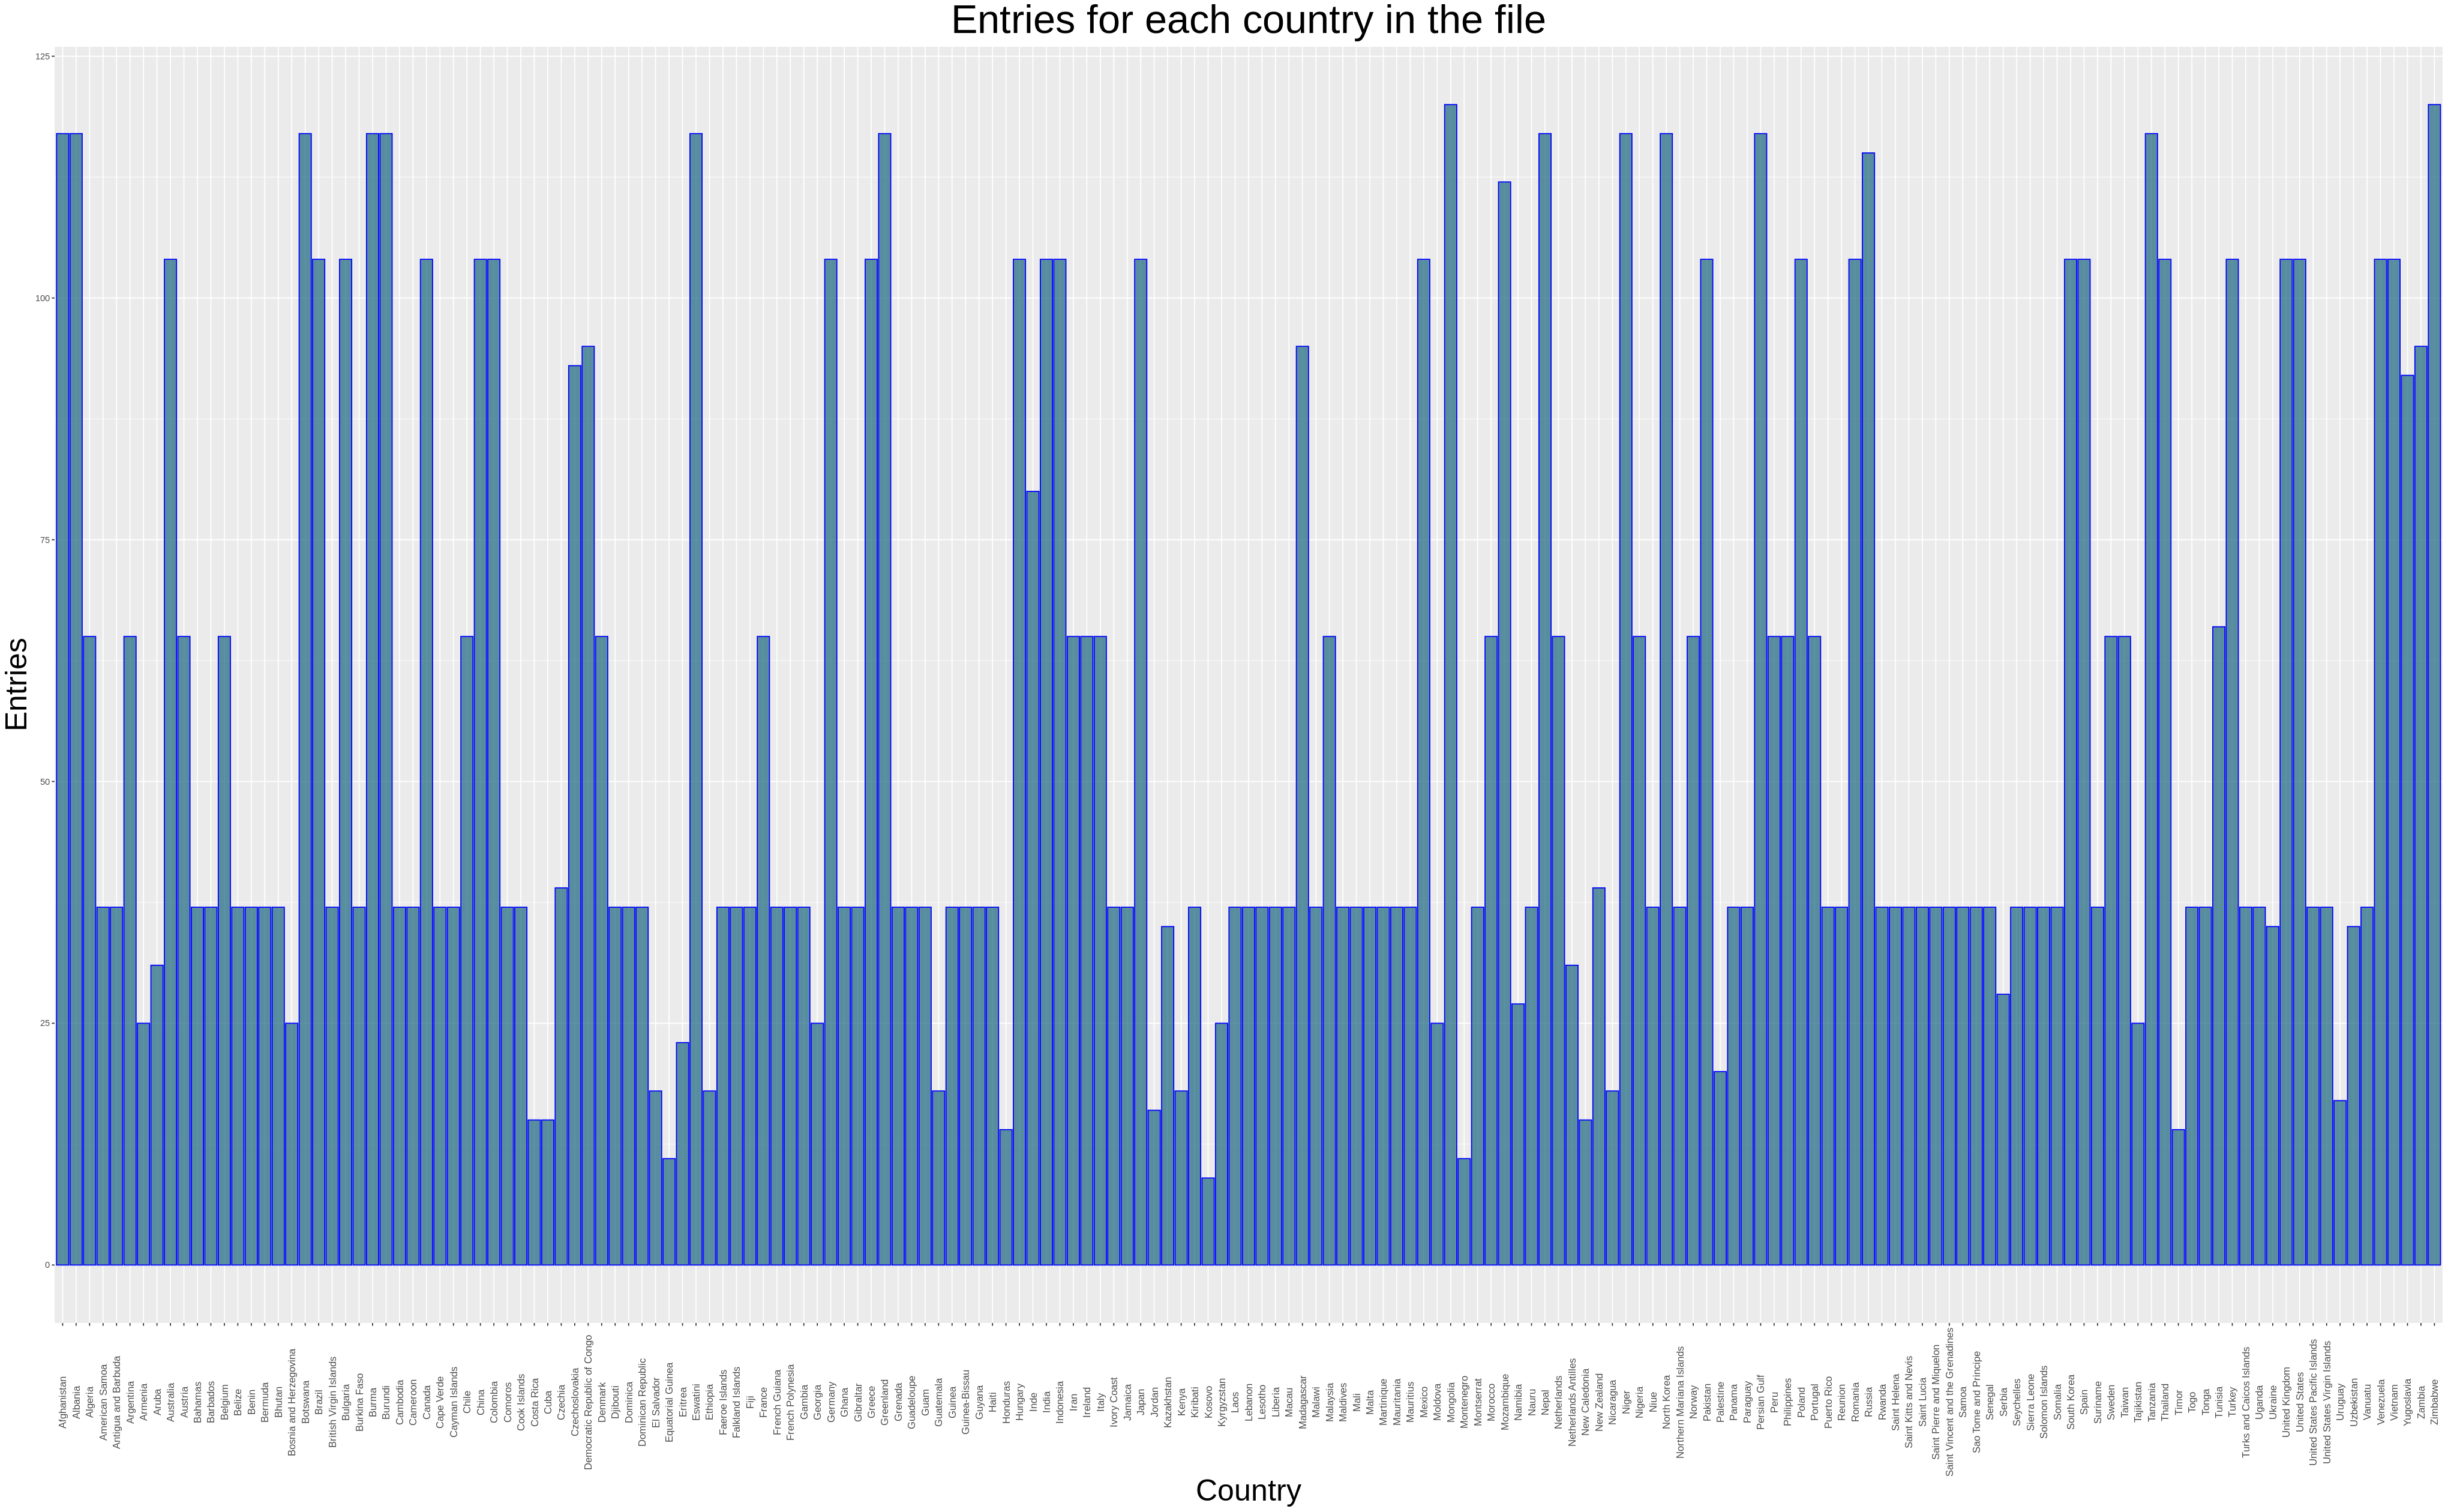

In [21]:
options(repr.plot.width = 34, repr.plot.height = 21)

ggplot(df, aes(x=value, y=count)) +
    ggtitle("Entries for each country in the file") +
    geom_bar(stat="identity", color="blue", fill=rgb(0.1,0.4,0.5,0.7)) + 
    labs(x="Country", y="Entries") +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=0.5, size=10), 
            plot.title = element_text(size=40,hjust = 0.5),
            axis.title.x = element_text(size=30),
            axis.title.y = element_text(size=30)
         )

## Select only the years $\geq 1970$ 

In [22]:
coal_new<-filter(coal,coal$Year>=1970)

In [23]:
# To compute the total integrated coal production, the rate is multiplied over the hours in a year
annual_hours <- 365*24

sum_coal <- rowsum(coal_new[,4], group=coal_new$Entity)*annual_hours

df <- tibble(countries=row.names(sum_coal)[order(sum_coal$Coal, decreasing=TRUE)][c(1,2,3,4,5)],coal_production=sum_coal[order(sum_coal$Coal, decreasing=TRUE)[c(1,2,3,4,5)],])
cat("Top five countries with highest coal productions with their integrated production are:")
df



Top five countries with highest coal productions with their integrated production are:

countries,coal_production
China,4025786308
United States,1980363012
Russia,892718355
Australia,727755089
India,674900648


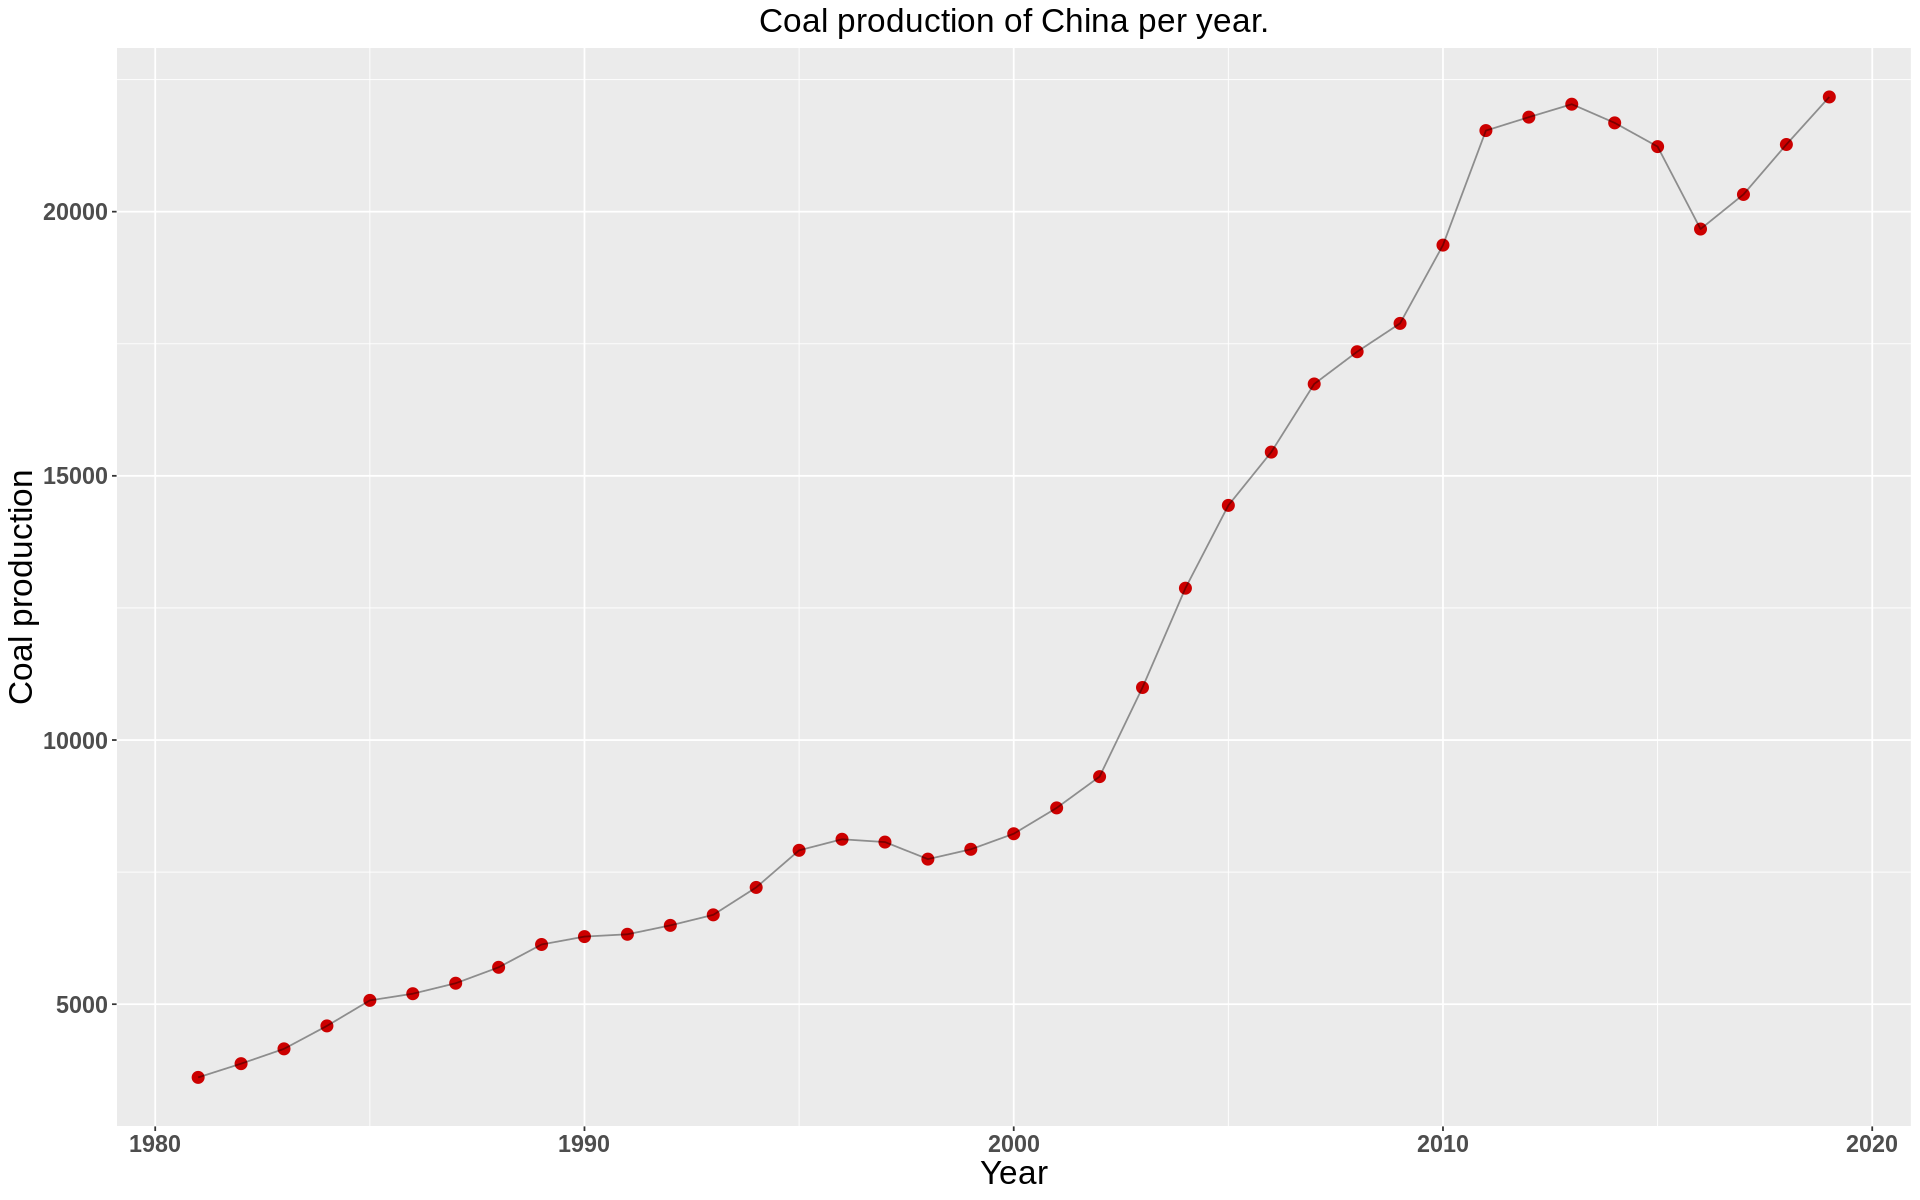

In [24]:
options(repr.plot.width = 16, repr.plot.height = 10)
plt <- ggplot(data=(coal_new[coal_new$Entity==as.character(df[1,1]),]),aes(x=Year,y=Coal.production..TWh.))+geom_point(colour="#CC0000",size=3)+geom_line(alpha=.4)
plt <- plt +ylab("Coal production") +ggtitle(paste0("Coal production of ",df[1,1]," per year."))
plt+theme(plot.title= element_text(hjust=0.5,size=20),
          axis.title.x = element_text(size=20),
            axis.title.y = element_text(size=20),
         axis.text.x = element_text(face="bold", 
                           size=14),
          axis.text.y = element_text(face="bold", 
                           size=14))

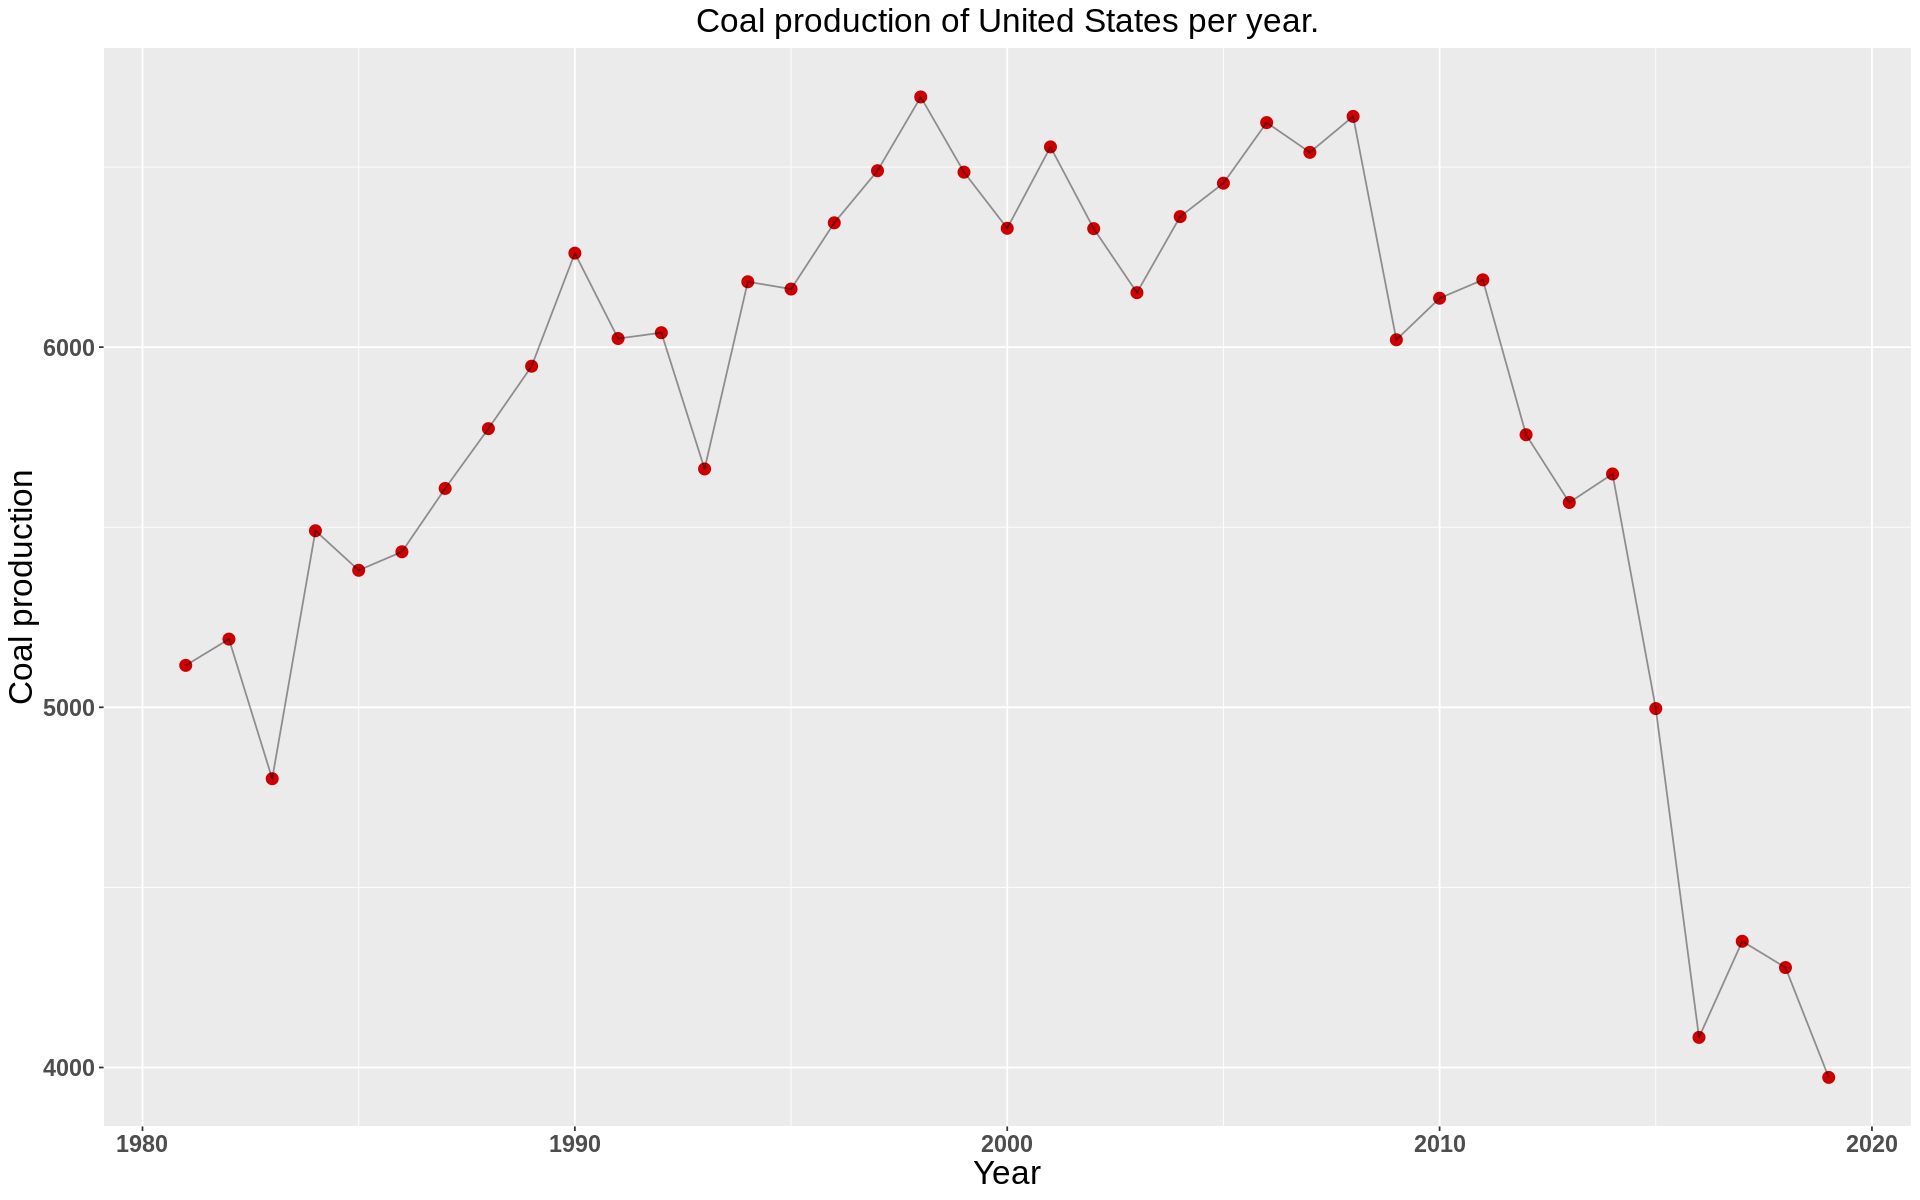

In [25]:
options(repr.plot.width = 16, repr.plot.height = 10)
plt <- ggplot(data=(coal_new[coal_new$Entity==as.character(df[2,1]),]),aes(x=Year,y=Coal.production..TWh.))+geom_point(colour="#CC0000",size=3)+geom_line(alpha=.4)
plt <- plt +ylab("Coal production") +ggtitle(paste0("Coal production of ",df[2,1]," per year."))
plt+theme(plot.title= element_text(hjust=0.5,size=20),
          axis.title.x = element_text(size=20),
            axis.title.y = element_text(size=20),
         axis.text.x = element_text(face="bold", 
                           size=14),
          axis.text.y = element_text(face="bold", 
                           size=14))

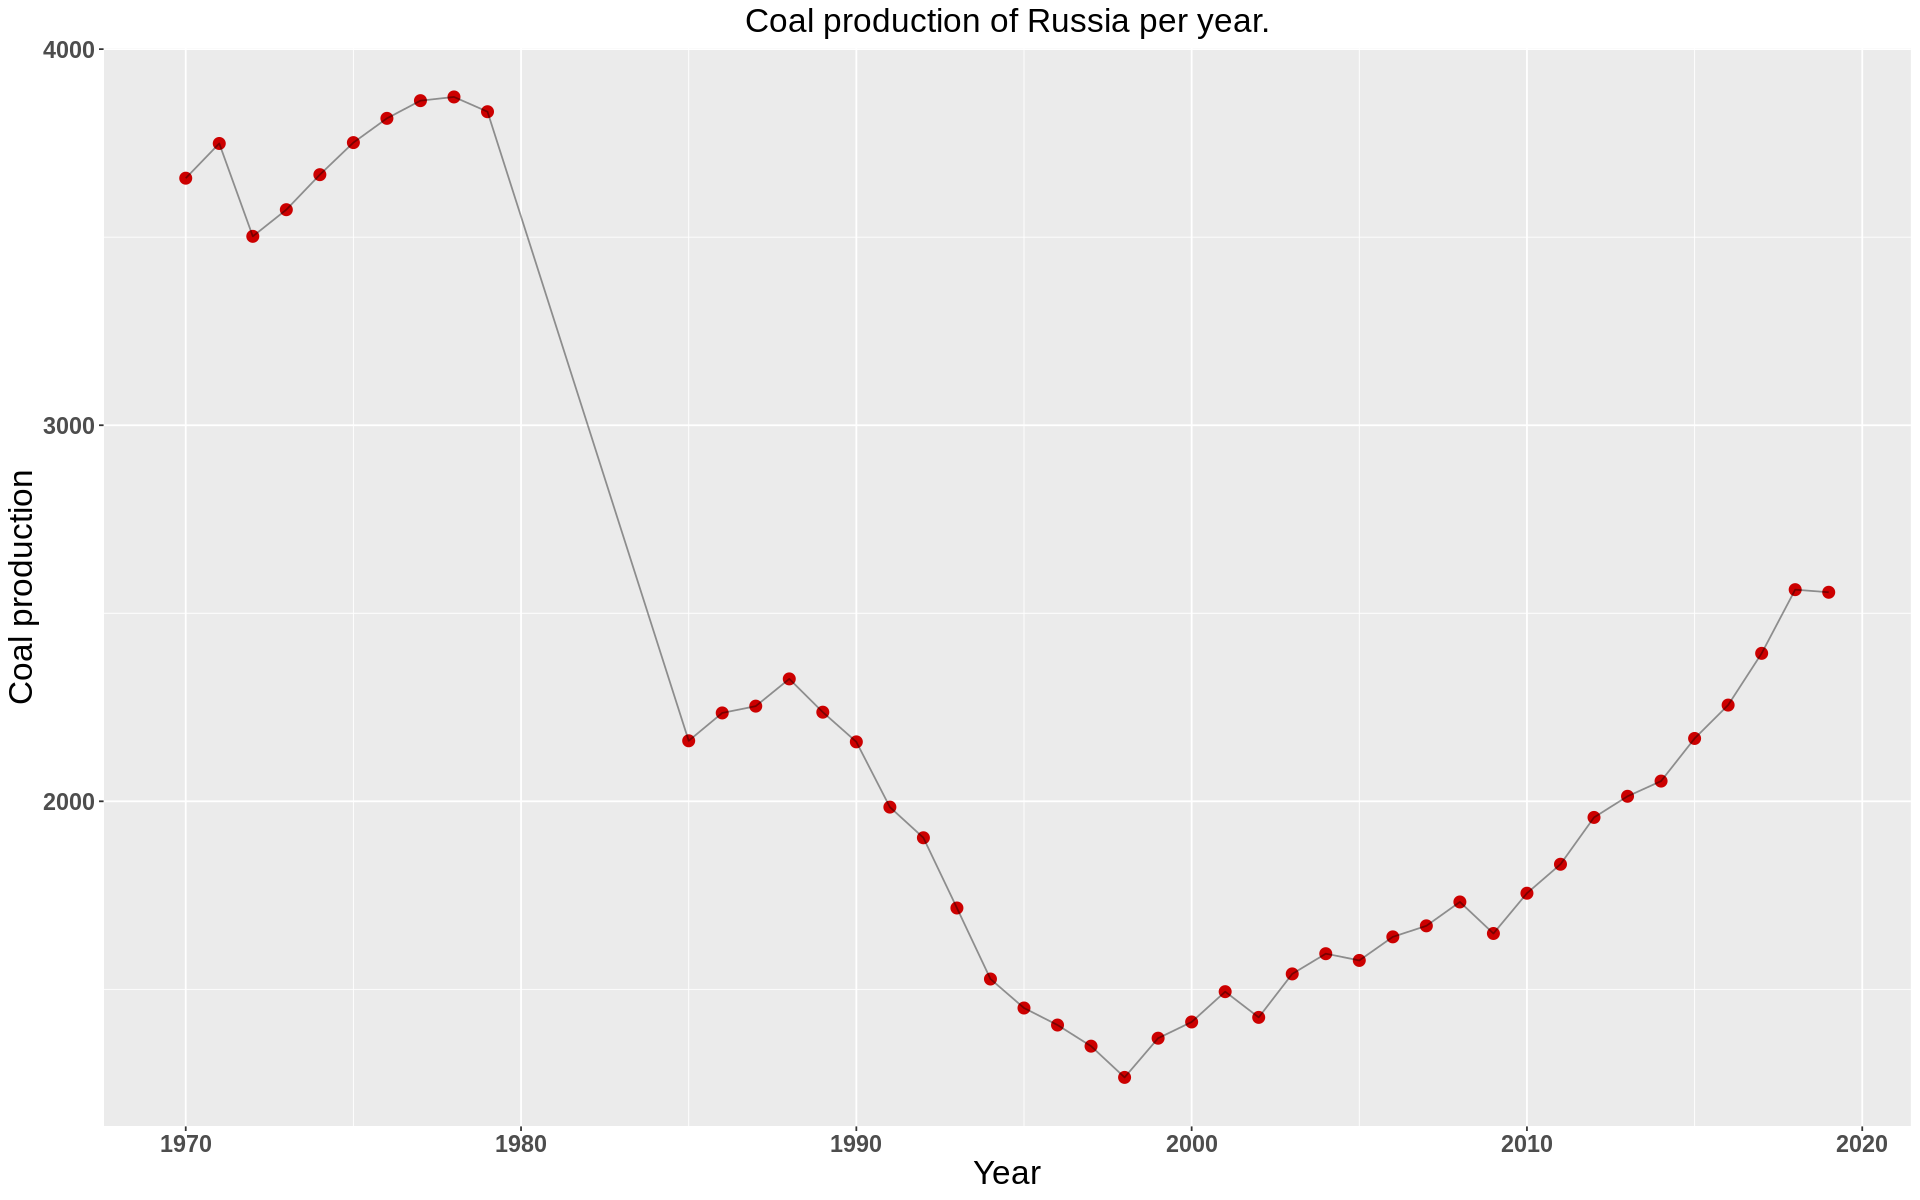

In [26]:
options(repr.plot.width = 16, repr.plot.height = 10)
plt <- ggplot(data=(coal_new[coal_new$Entity==as.character(df[3,1]),]),aes(x=Year,y=Coal.production..TWh.))+geom_point(colour="#CC0000",size=3)+geom_line(alpha=.4)
plt <- plt +ylab("Coal production") +ggtitle(paste0("Coal production of ",df[3,1]," per year."))
plt+theme(plot.title= element_text(hjust=0.5,size=20),
          axis.title.x = element_text(size=20),
            axis.title.y = element_text(size=20),
         axis.text.x = element_text(face="bold", 
                           size=14),
          axis.text.y = element_text(face="bold", 
                           size=14))

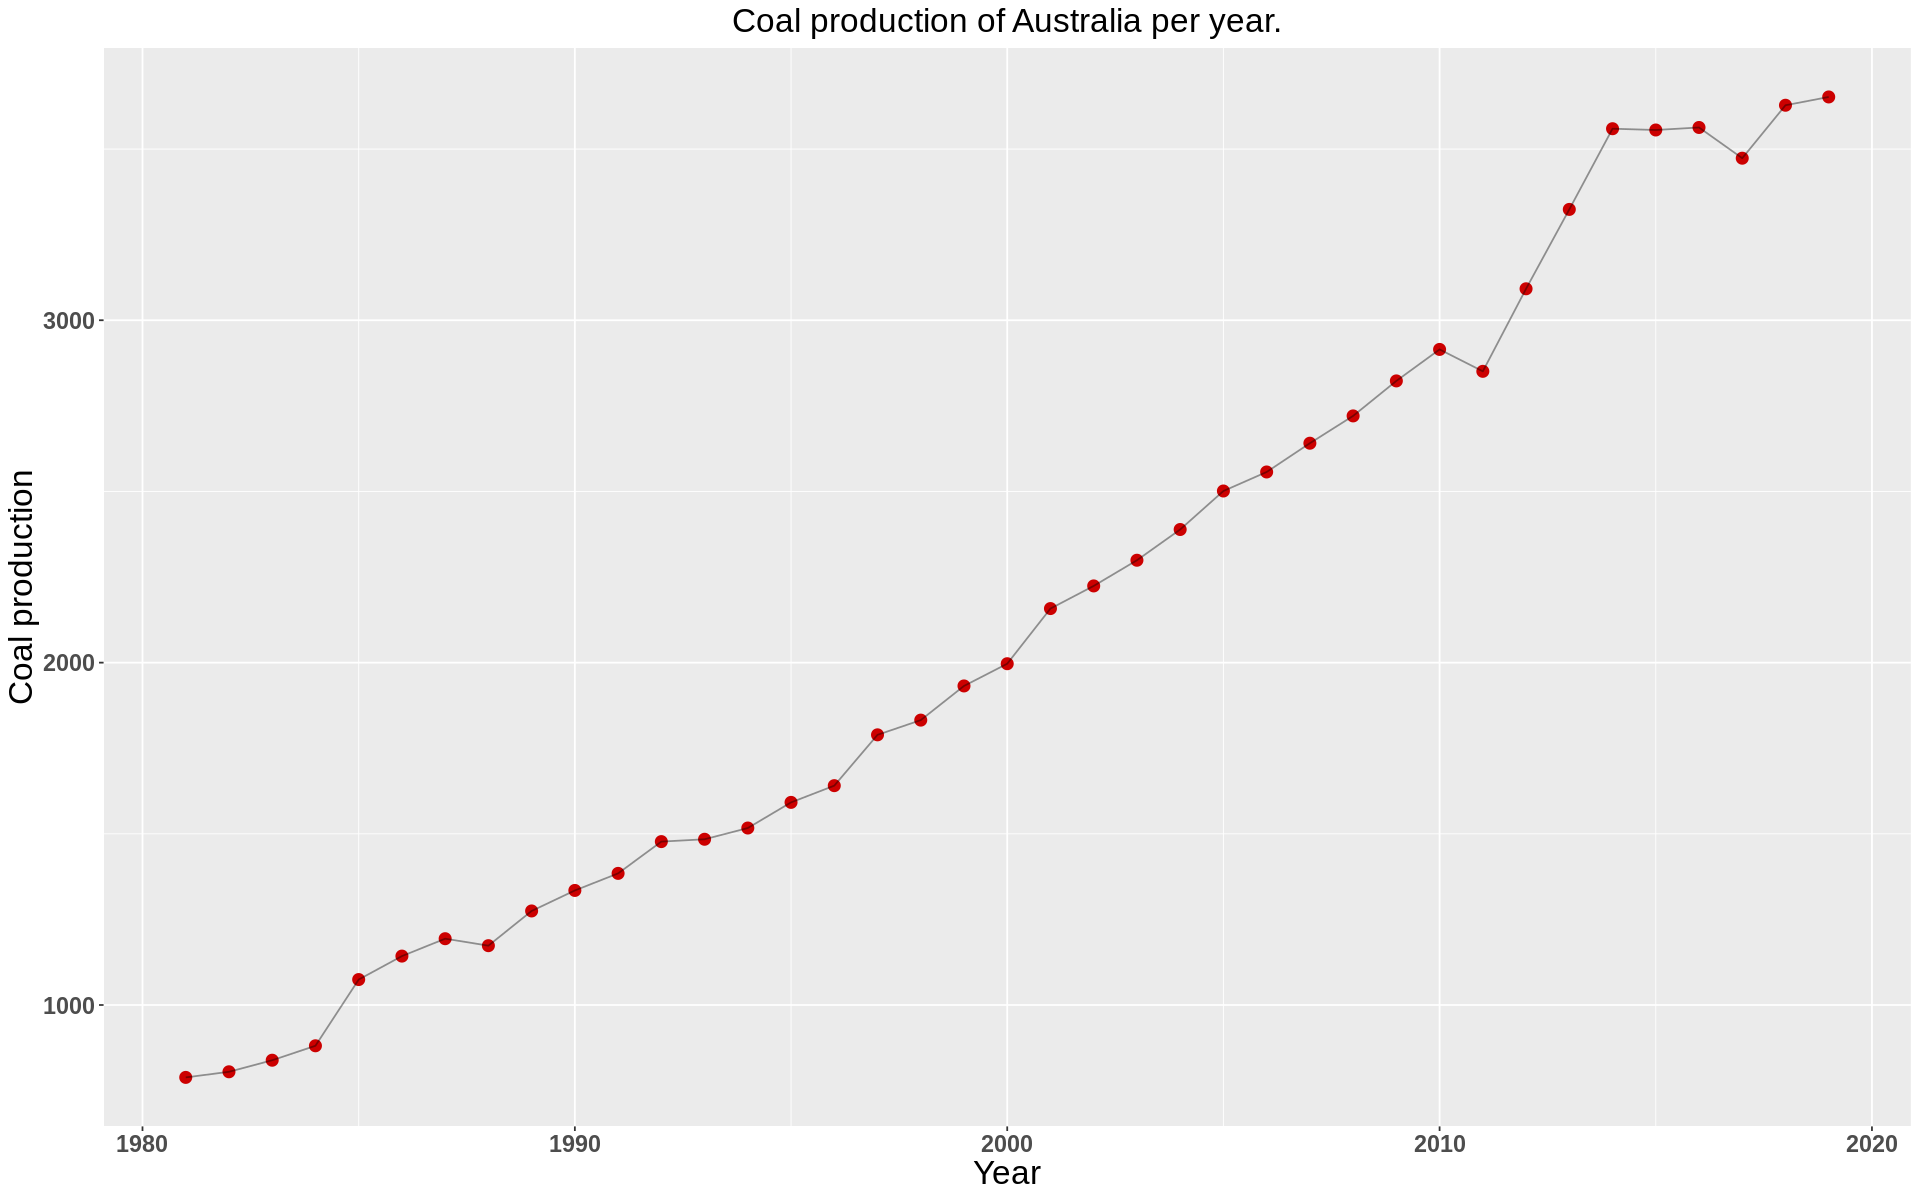

In [27]:
options(repr.plot.width = 16, repr.plot.height = 10)
plt <- ggplot(data=(coal_new[coal_new$Entity==as.character(df[4,1]),]),aes(x=Year,y=Coal.production..TWh.))+geom_point(colour="#CC0000",size=3)+geom_line(alpha=.4)
plt <- plt +ylab("Coal production") +ggtitle(paste0("Coal production of ",df[4,1]," per year."))
plt+theme(plot.title= element_text(hjust=0.5,size=20),
          axis.title.x = element_text(size=20),
            axis.title.y = element_text(size=20),
         axis.text.x = element_text(face="bold", 
                           size=14),
          axis.text.y = element_text(face="bold", 
                           size=14))

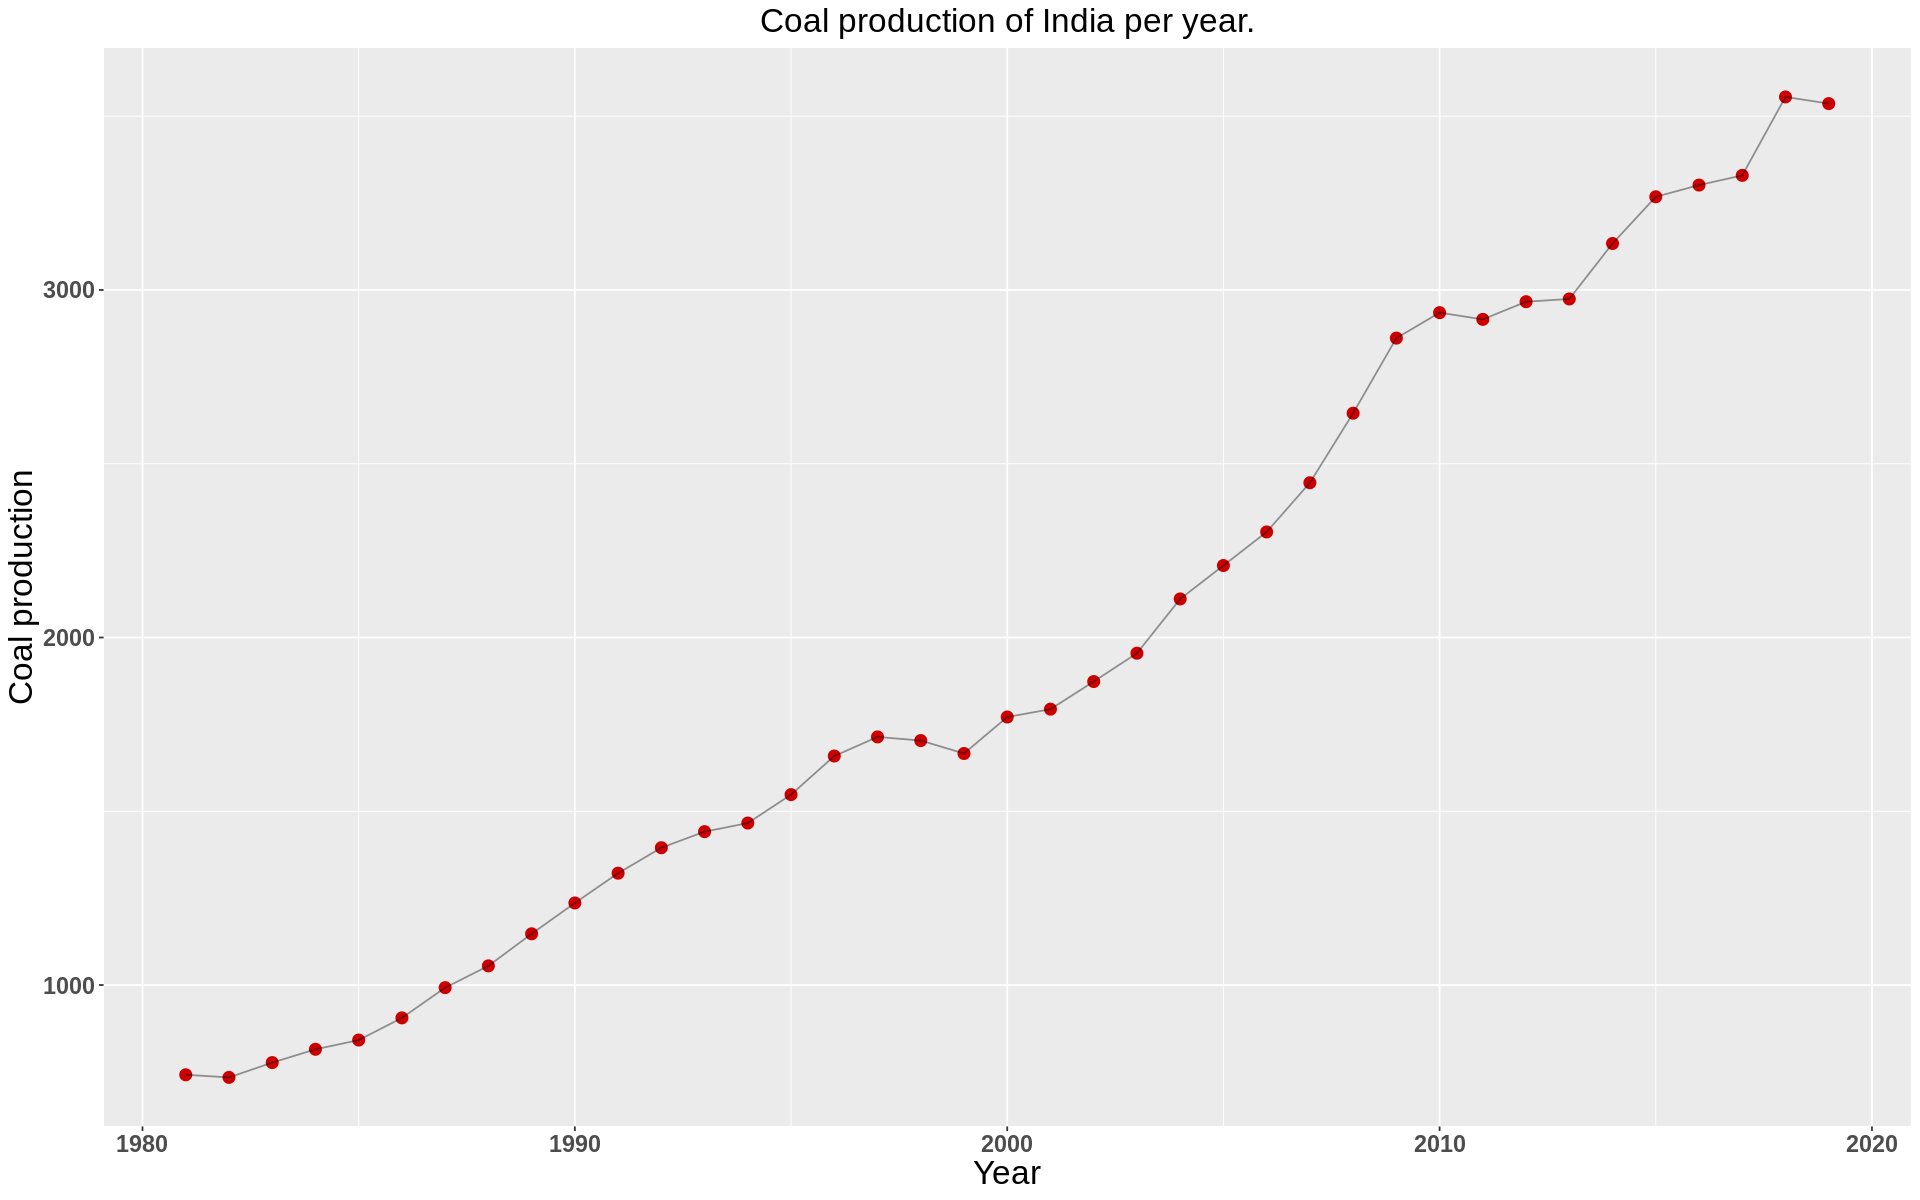

In [28]:
options(repr.plot.width = 16, repr.plot.height = 10)
plt <- ggplot(data=(coal_new[coal_new$Entity==as.character(df[5,1]),]),aes(x=Year,y=Coal.production..TWh.))+geom_point(colour="#CC0000",size=3)+geom_line(alpha=.4)
plt <- plt +ylab("Coal production") +ggtitle(paste0("Coal production of ",df[5,1]," per year."))
plt+theme(plot.title= element_text(hjust=0.5,size=20),
          axis.title.x = element_text(size=20),
            axis.title.y = element_text(size=20),
         axis.text.x = element_text(face="bold", 
                           size=14),
          axis.text.y = element_text(face="bold", 
                           size=14))

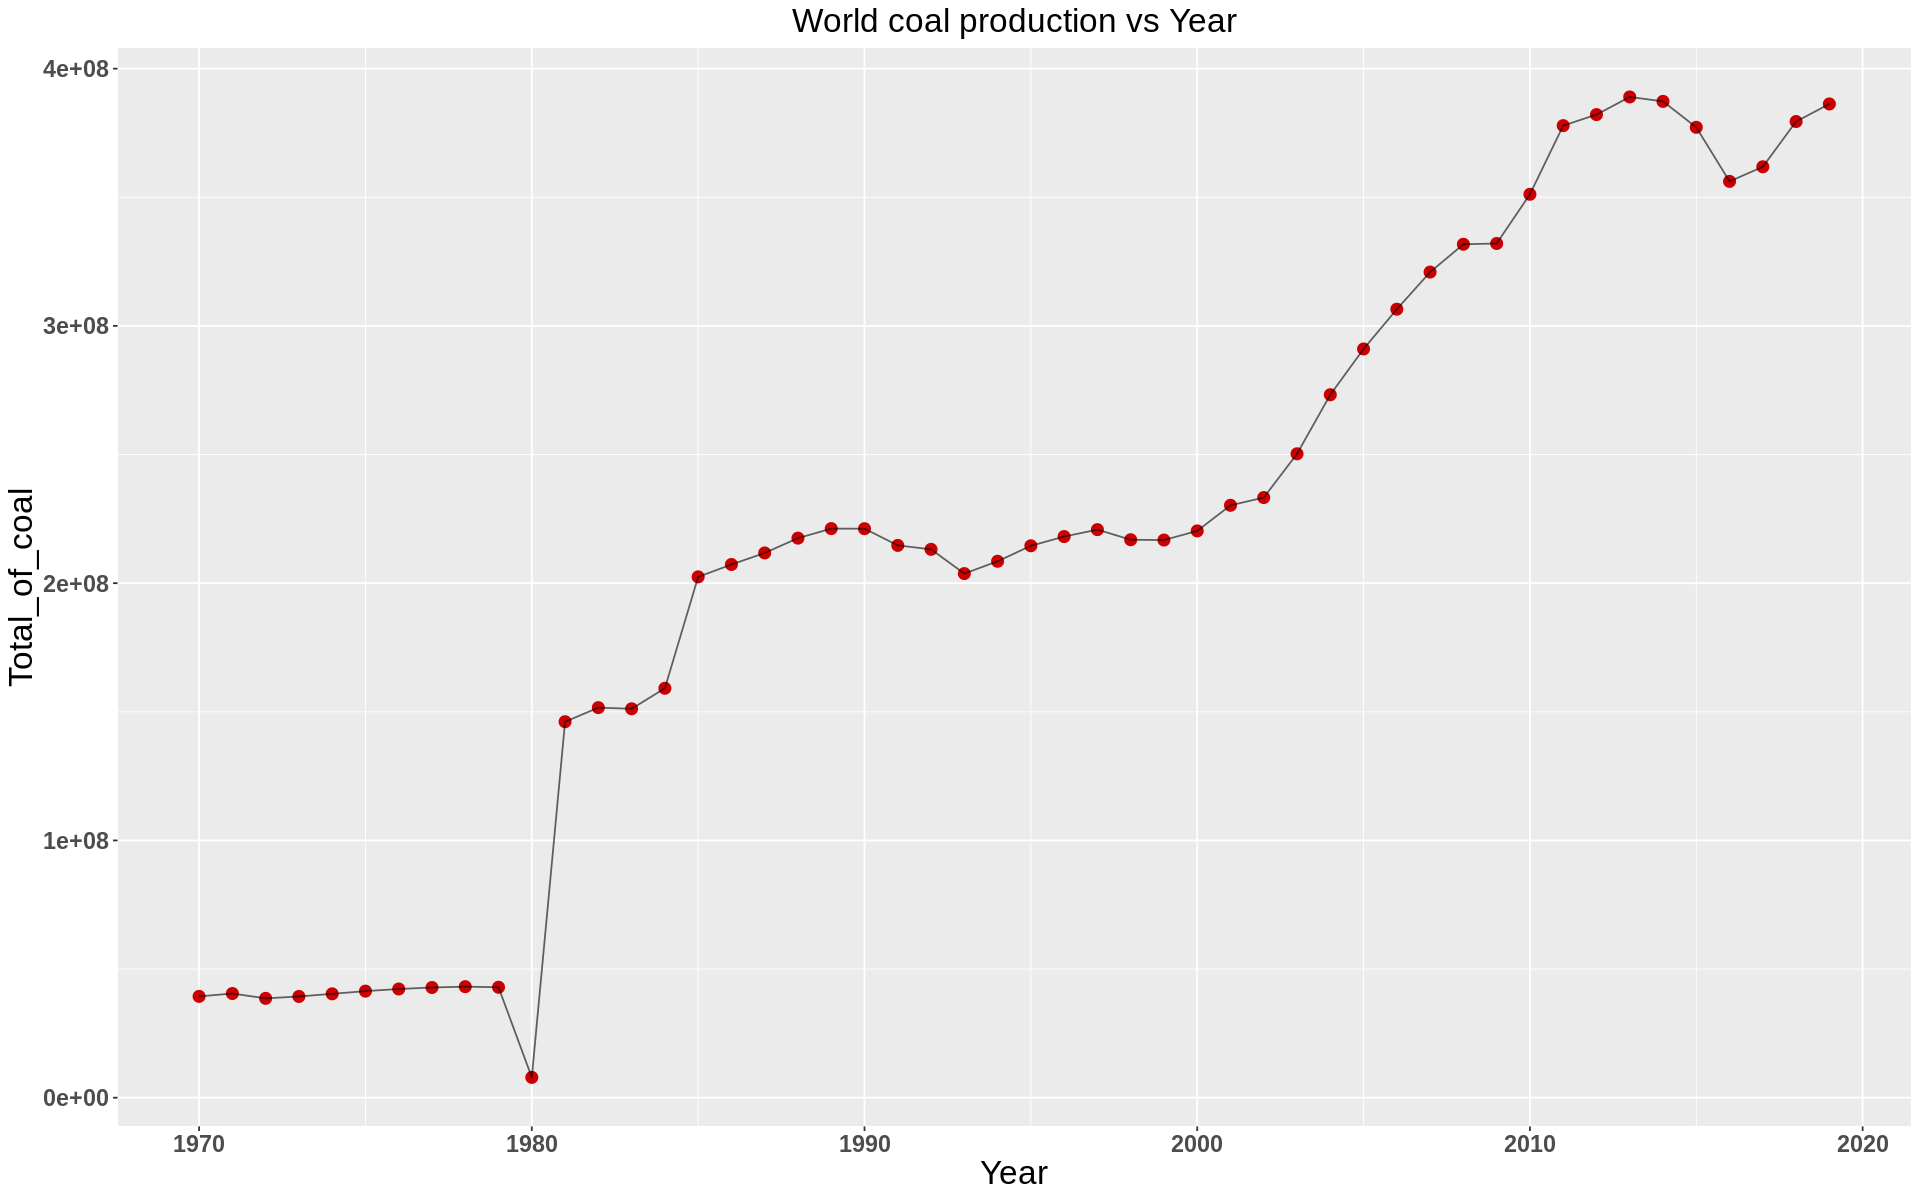

In [29]:
sum_coal <- rowsum(coal_new[,4], group=coal_new$Year)*annual_hours
df <- tibble(Year=unique(coal_new$Year),Total_of_coal=sum_coal[,])
options(repr.plot.width = 16, repr.plot.height = 10)
plt <- ggplot(data=(df),aes(x=Year,y=Total_of_coal))+geom_point(colour="#CC0000",size=3)+geom_line(alpha=.6)+ggtitle("World coal production vs Year")
plt+theme(plot.title= element_text(hjust=0.5,size=20),
          axis.title.x = element_text(size=20),
            axis.title.y = element_text(size=20),
         axis.text.x = element_text(face="bold", 
                           size=14),
          axis.text.y = element_text(face="bold", 
                           size=14))

 # Ex 4.1
 

## Italy

In [3]:
vaccination <- tibble(read.table("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-manufacturer.csv",sep=",",header = TRUE ))
ita_vaccination <- filter(vaccination,vaccination$location=="Italy" )
head(ita_vaccination)

location,date,vaccine,total_vaccinations
Italy,2020-12-27,Pfizer/BioNTech,7169
Italy,2020-12-28,Pfizer/BioNTech,8590
Italy,2020-12-29,Pfizer/BioNTech,9595
Italy,2020-12-30,Pfizer/BioNTech,14322
Italy,2020-12-31,Pfizer/BioNTech,39798
Italy,2021-01-01,Pfizer/BioNTech,50852


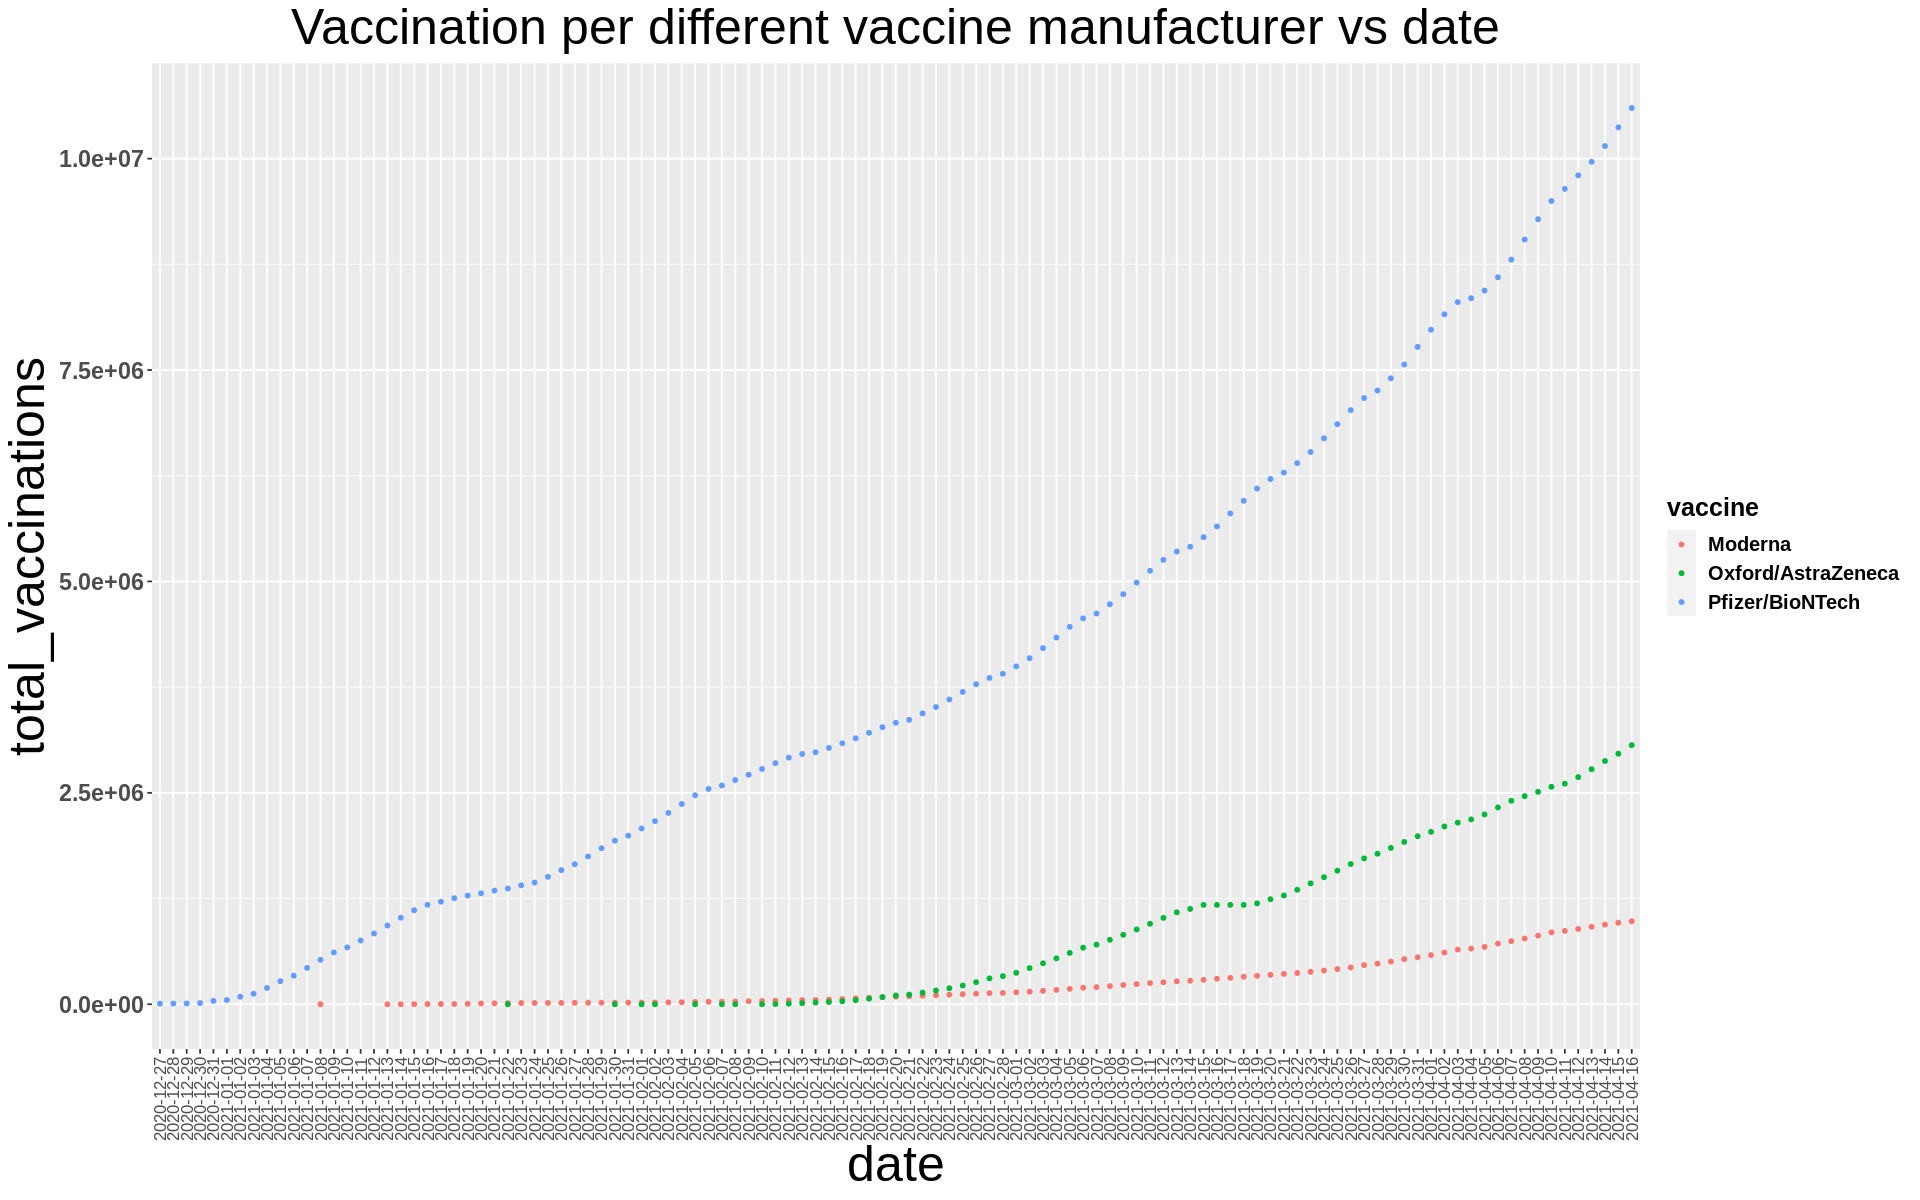

In [31]:
options(repr.plot.width = 16, repr.plot.height = 10)
plt <- ggplot(data=(ita_vaccination),aes(x=date,y=total_vaccinations,color=vaccine))+geom_point(size=1)+ggtitle("Vaccination per different vaccine manufacturer vs date")
plt+theme(plot.title= element_text(hjust=0.5,size=30),
          axis.title.x = element_text(size=30),
            axis.title.y = element_text(size=30),
         axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=0.5, size=10),
          axis.text.y = element_text(face="bold", 
                           size=14),legend.text = element_text(size = 12, face = "bold"),legend.title = element_text(size=15,face="bold"))

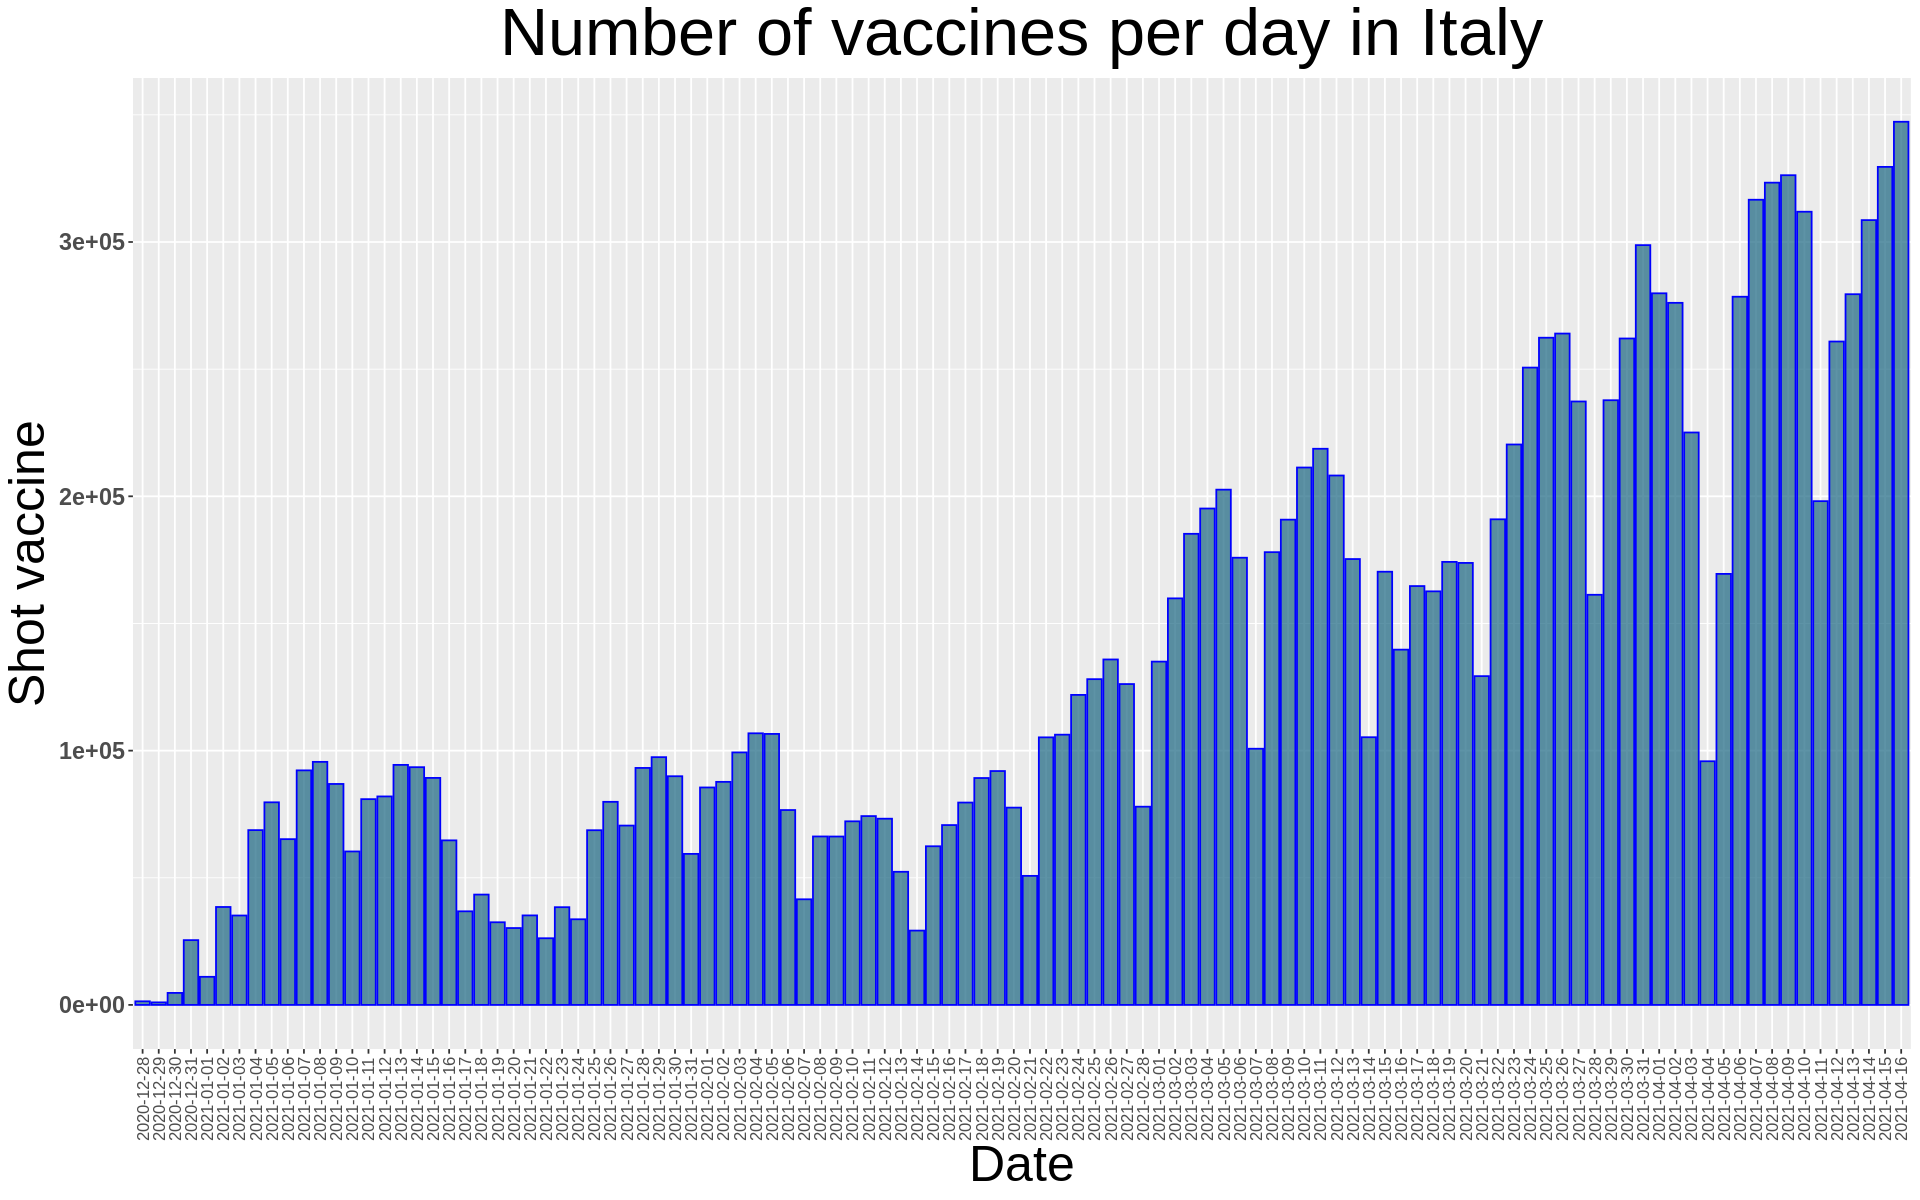

In [32]:
ita_date <- ita_vaccination %>% group_by(date)
ita_s <- ita_date %>% summarise(sum = sum(total_vaccinations))

df <- tibble(shot = diff(ita_s$sum), date=unique(ita_s$date[-1]))
options(repr.plot.width = 16, repr.plot.height = 10)

ggplot(df,aes(x=date,y=shot))+ ggtitle("Number of vaccines per day in Italy")+
       geom_bar(stat="identity",color="blue", fill=rgb(0.1,0.4,0.5,0.7))+
       labs(x="Date",y="Shot vaccine")+
       theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=0.5, size=10), 
            plot.title = element_text(size=40,hjust = 0.5),
            axis.title.x = element_text(size=30),
             axis.text.y = element_text(face="bold",size=14),
            axis.title.y = element_text(size=30)
         )

## Germany

In [33]:
german_vaccination <- filter(vaccination,vaccination$location=="Germany" )
head(german_vaccination)

location,date,vaccine,total_vaccinations
Germany,2020-12-27,Moderna,0
Germany,2020-12-27,Oxford/AstraZeneca,0
Germany,2020-12-27,Pfizer/BioNTech,24296
Germany,2020-12-28,Moderna,0
Germany,2020-12-28,Oxford/AstraZeneca,0
Germany,2020-12-28,Pfizer/BioNTech,42679


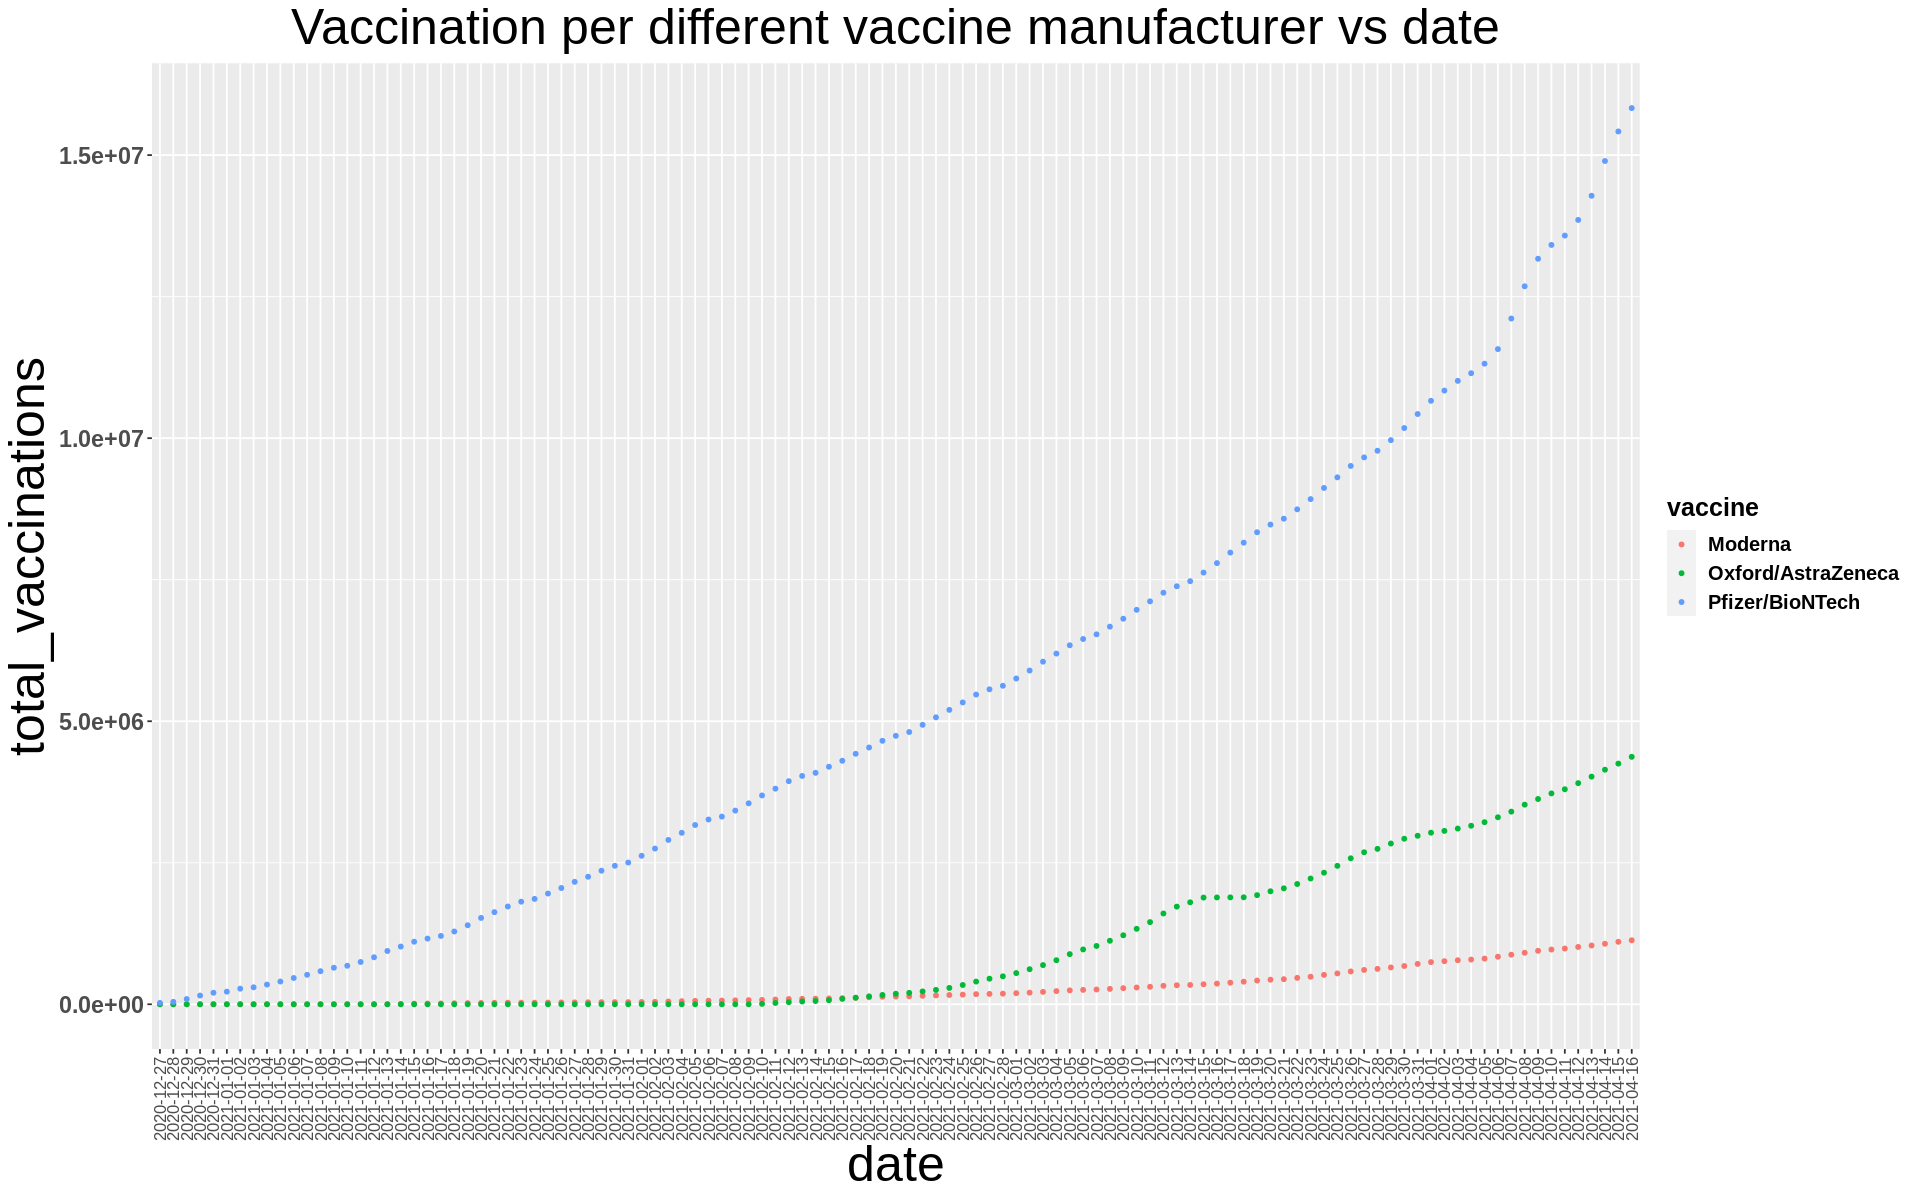

In [34]:
options(repr.plot.width = 16, repr.plot.height = 10)
plt <- ggplot(data=(german_vaccination),aes(x=date,y=total_vaccinations,color=vaccine))+geom_point(size=1)+ggtitle("Vaccination per different vaccine manufacturer vs date")
plt+theme(plot.title= element_text(hjust=0.5,size=30),
          axis.title.x = element_text(size=30),
            axis.title.y = element_text(size=30),
         axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=0.5, size=10),
          axis.text.y = element_text(face="bold", 
                           size=14),legend.text = element_text(size = 12, face = "bold"),legend.title = element_text(size=15,face="bold"))

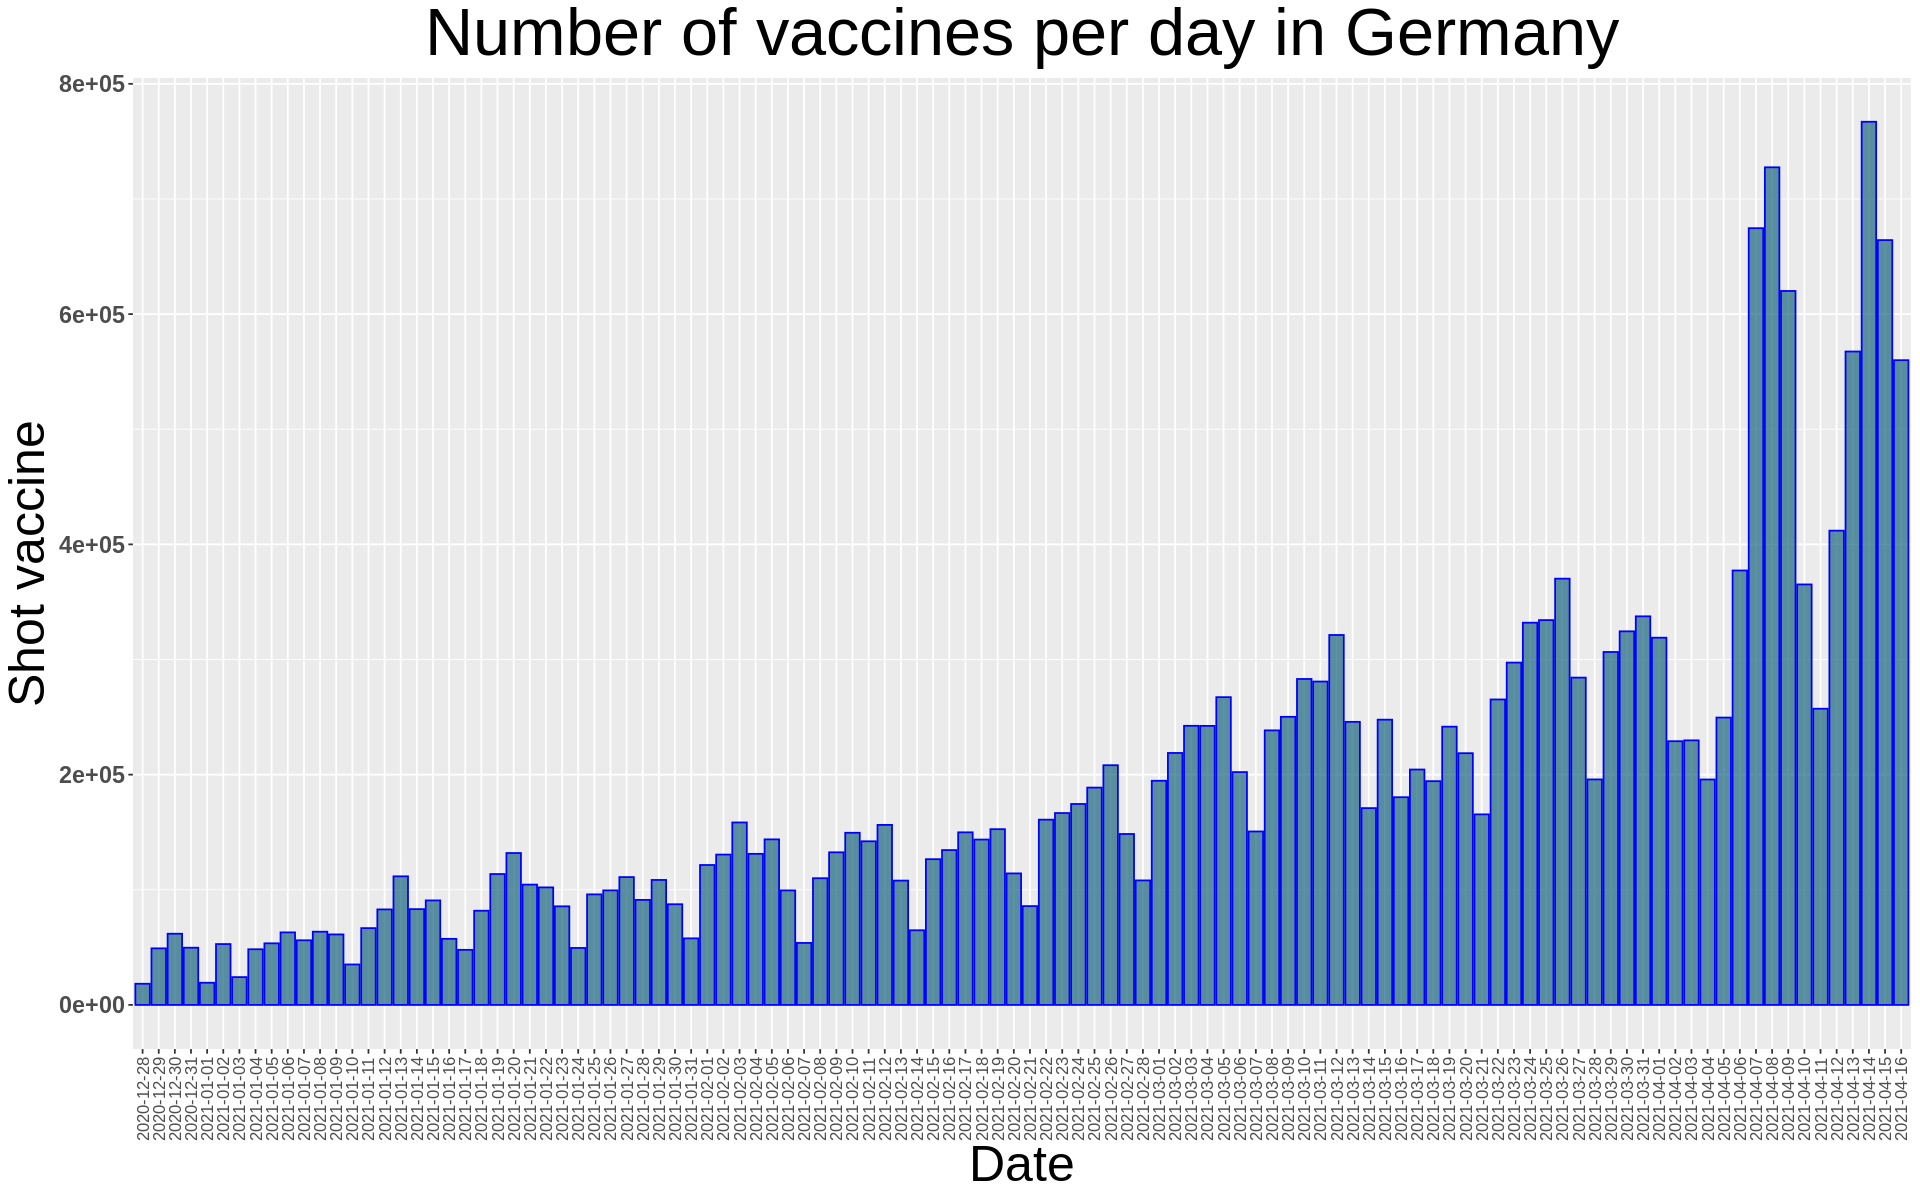

In [35]:
ger_date <- german_vaccination %>% group_by(date)
ger_s <- ger_date %>% summarise(sum = sum(total_vaccinations))

df <- tibble(shot = diff(ger_s$sum), date=ger_s$date[-1])
options(repr.plot.width = 16, repr.plot.height = 10)

ggplot(df,aes(x=date,y=shot))+ ggtitle("Number of vaccines per day in Germany")+
       geom_bar(stat="identity",color="blue", fill=rgb(0.1,0.4,0.5,0.7))+
       labs(x="Date",y="Shot vaccine")+
       theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=0.5, size=10), 
            plot.title = element_text(size=40,hjust = 0.5),
            axis.title.x = element_text(size=30),
             axis.text.y = element_text(face="bold",size=14),
            axis.title.y = element_text(size=30)
         )

## USA

In [36]:
usa_vaccination <- filter(vaccination,vaccination$location=="United States" )
head(usa_vaccination)

location,date,vaccine,total_vaccinations
United States,2021-01-12,Moderna,3835859
United States,2021-01-12,Pfizer/BioNTech,5488697
United States,2021-01-13,Moderna,4249795
United States,2021-01-13,Pfizer/BioNTech,6025872
United States,2021-01-15,Moderna,5122662
United States,2021-01-15,Pfizer/BioNTech,7153268


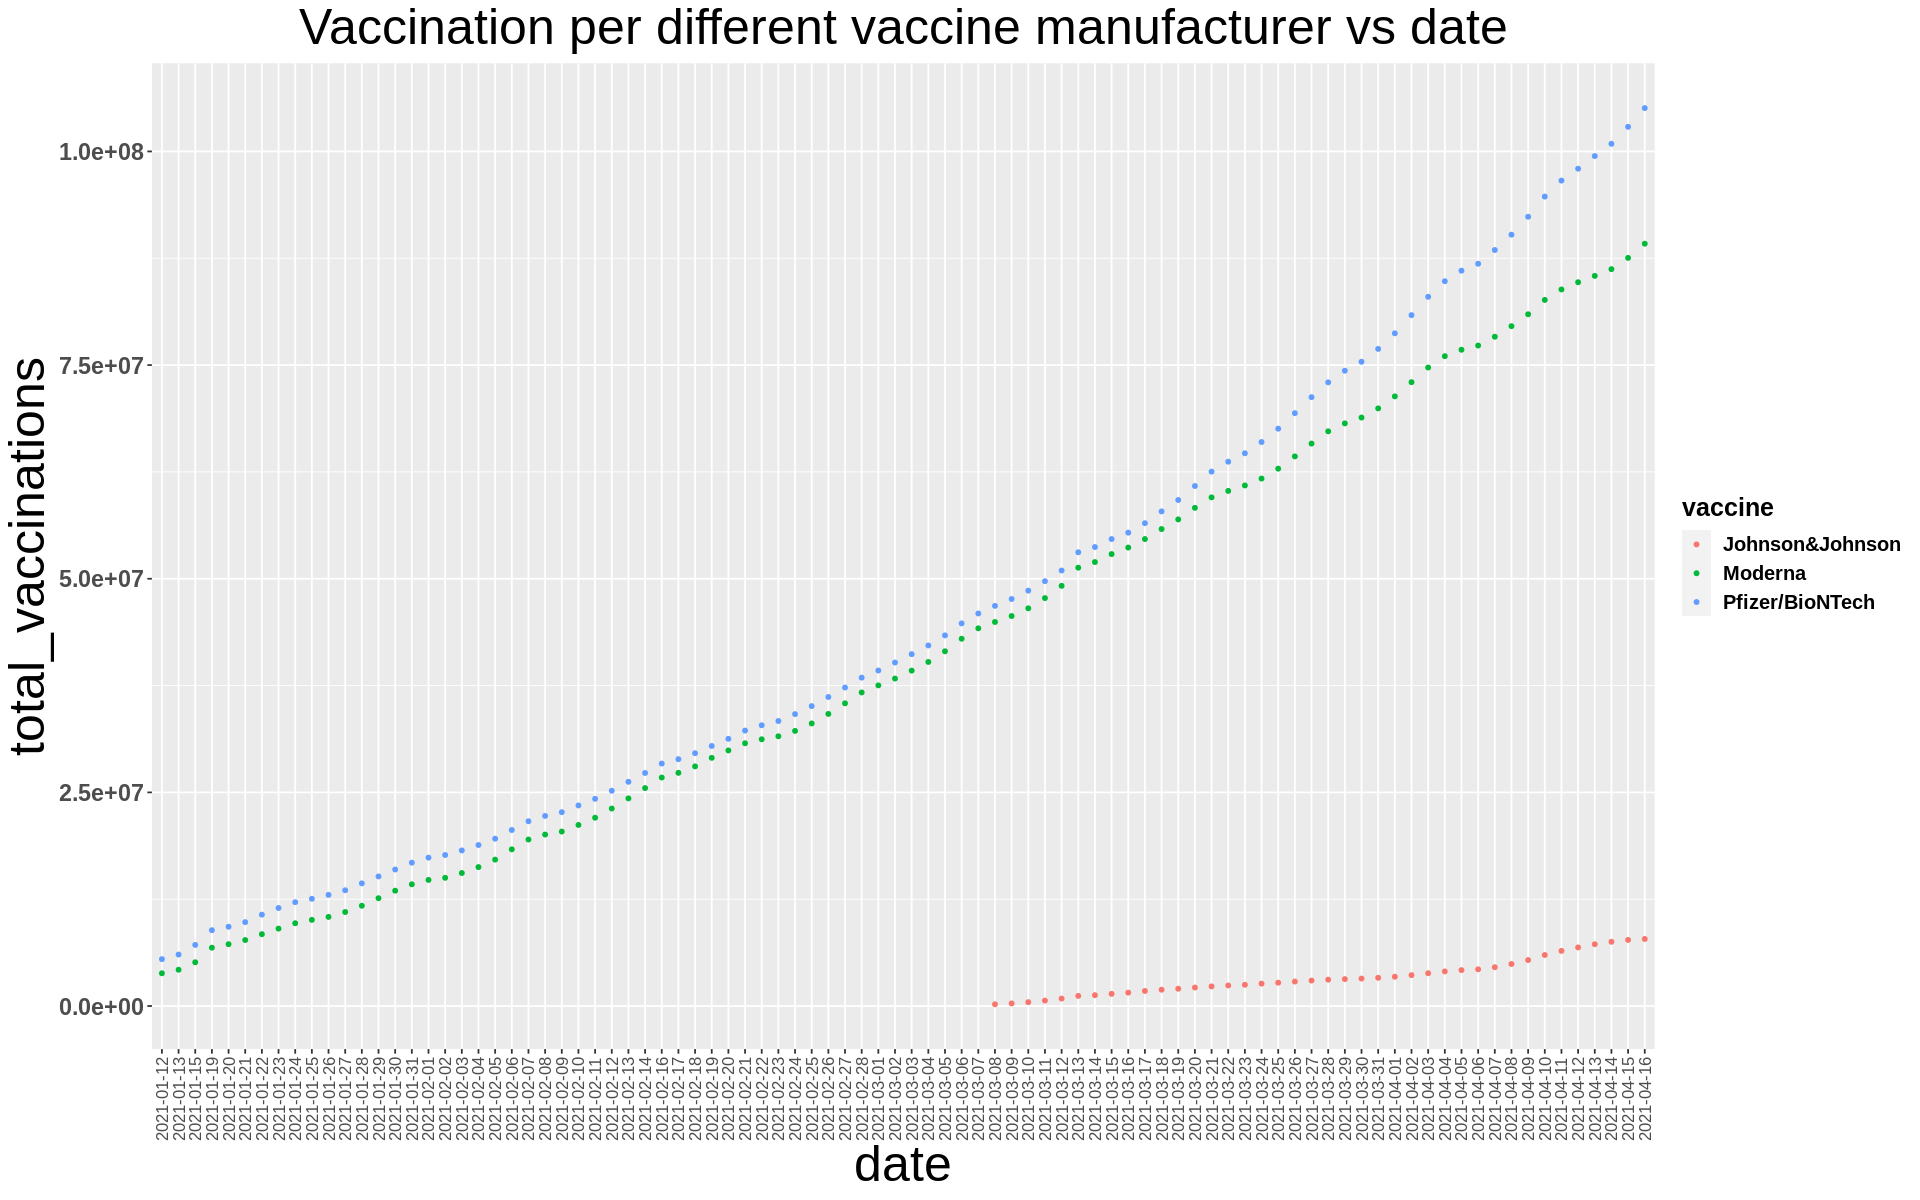

In [37]:
options(repr.plot.width = 16, repr.plot.height = 10)
plt <- ggplot(data=(usa_vaccination),aes(x=date,y=total_vaccinations,color=vaccine))+geom_point(size=1)+ggtitle("Vaccination per different vaccine manufacturer vs date")
plt+theme(plot.title= element_text(hjust=0.5,size=30),
          axis.title.x = element_text(size=30),
            axis.title.y = element_text(size=30),
         axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=0.5, size=10),
          axis.text.y = element_text(face="bold", 
                           size=14),legend.text = element_text(size = 12, face = "bold"),legend.title = element_text(size=15,face="bold"))

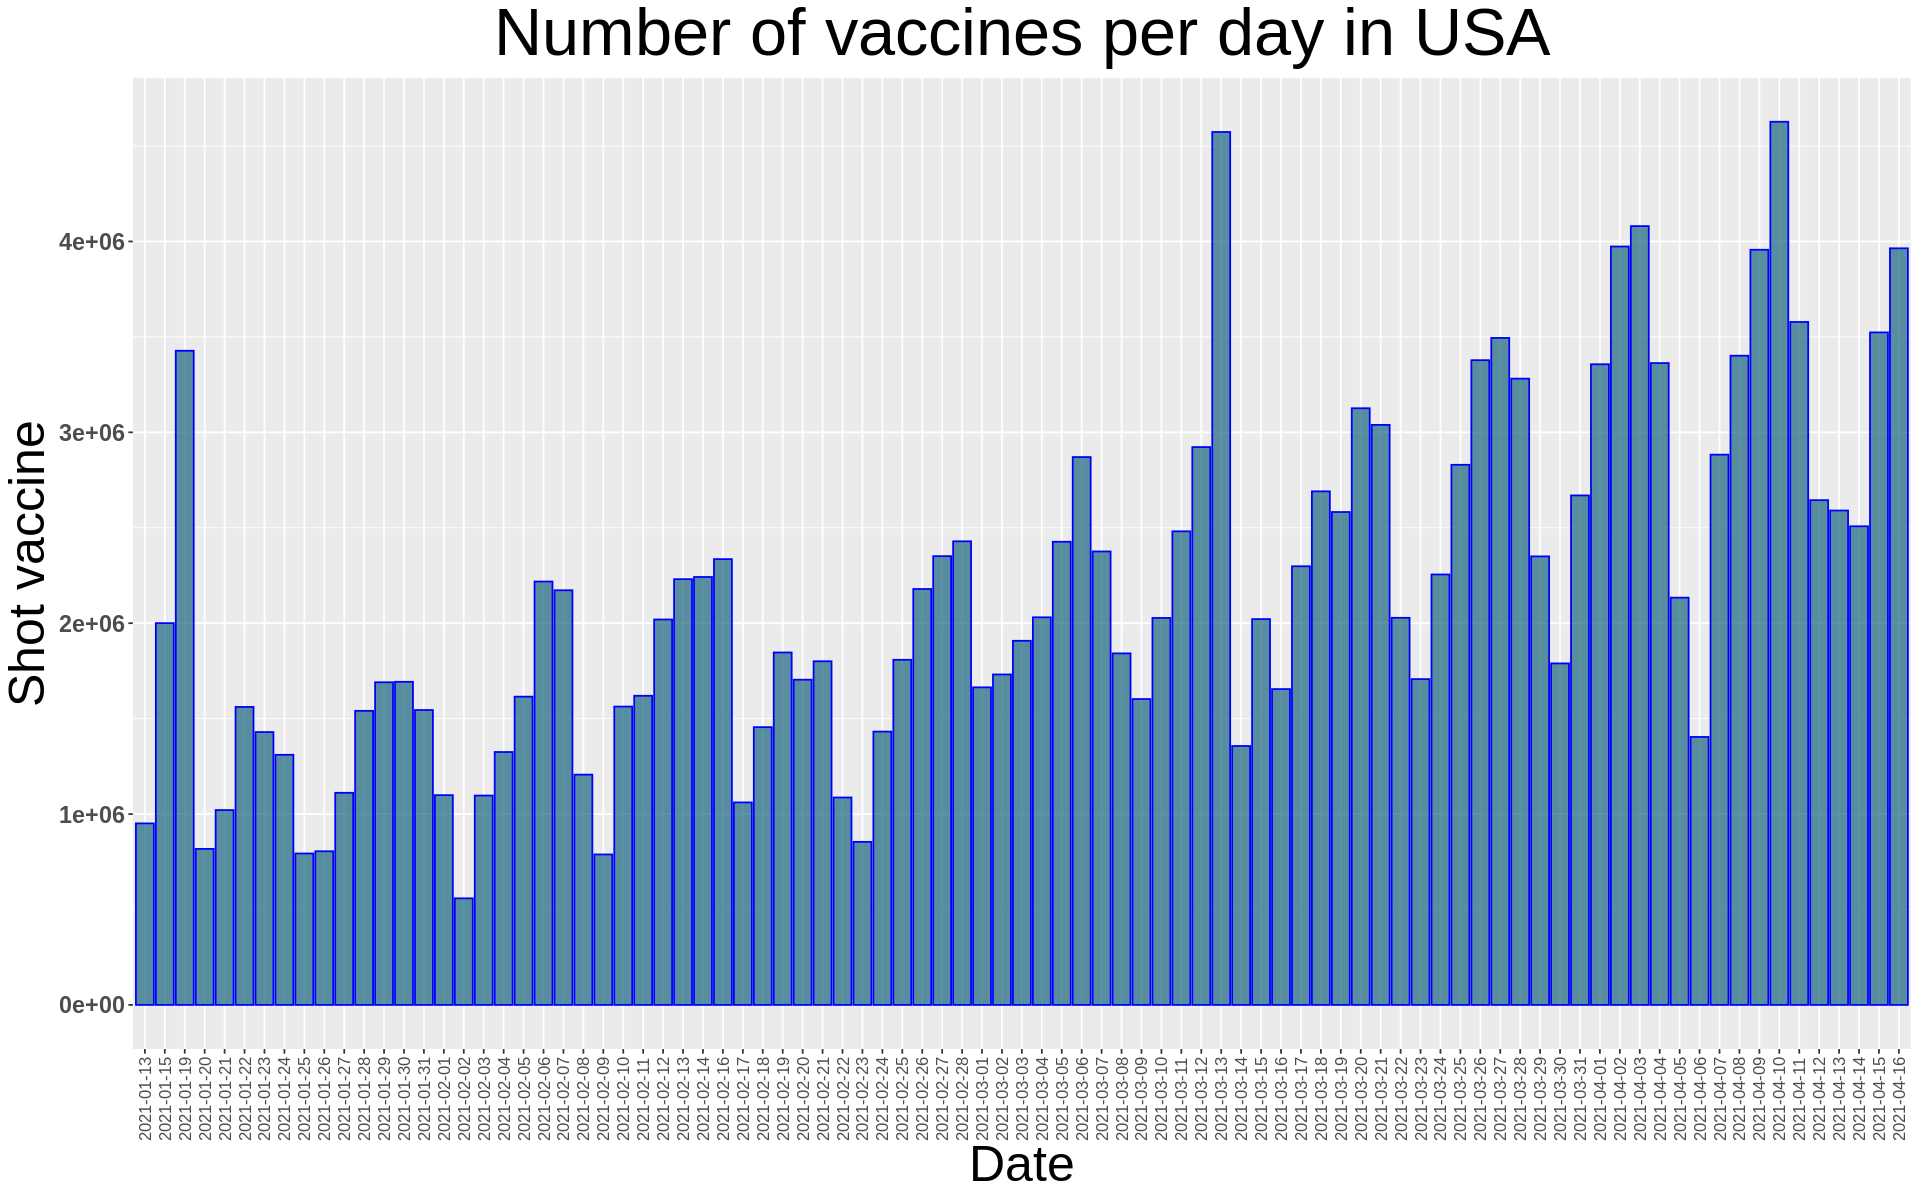

In [38]:
usa_date <- usa_vaccination %>% group_by(date)
usa_s <- usa_date %>% summarise(sum = sum(total_vaccinations))

df <- tibble(shot = diff(usa_s$sum), date=usa_s$date[-1])
options(repr.plot.width = 16, repr.plot.height = 10)

ggplot(df,aes(x=date,y=shot))+ ggtitle("Number of vaccines per day in USA")+
       geom_bar(stat="identity",color="blue", fill=rgb(0.1,0.4,0.5,0.7))+
       labs(x="Date",y="Shot vaccine")+
       theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=0.5, size=10), 
            plot.title = element_text(size=40,hjust = 0.5),
            axis.title.x = element_text(size=30),
             axis.text.y = element_text(face="bold",size=14),
            axis.title.y = element_text(size=30)
         )

# Ex 4.2


In [4]:
vacctot <- tibble(read.table ("./DATA//vaccination.csv",sep=",",header = T ))

In [40]:
vacctoteu <- filter(vacctot,vacctot$location=="Europe")
vacctoteu <- vacctoteu[-1:-1,]
head(vacctoteu)

location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
Europe,OWID_EUR,2020-12-14,NA,NA,NA,NA,14250,NA,NA,NA,19
Europe,OWID_EUR,2020-12-15,114965,114965,NA,NA,14250,0.02,0.02,NA,19
Europe,OWID_EUR,2020-12-16,NA,NA,NA,NA,48755,NA,NA,NA,65
Europe,OWID_EUR,2020-12-17,NA,NA,NA,NA,66007,NA,NA,NA,88
Europe,OWID_EUR,2020-12-18,NA,NA,NA,NA,76359,NA,NA,NA,102
Europe,OWID_EUR,2020-12-19,NA,NA,NA,NA,83259,NA,NA,NA,111


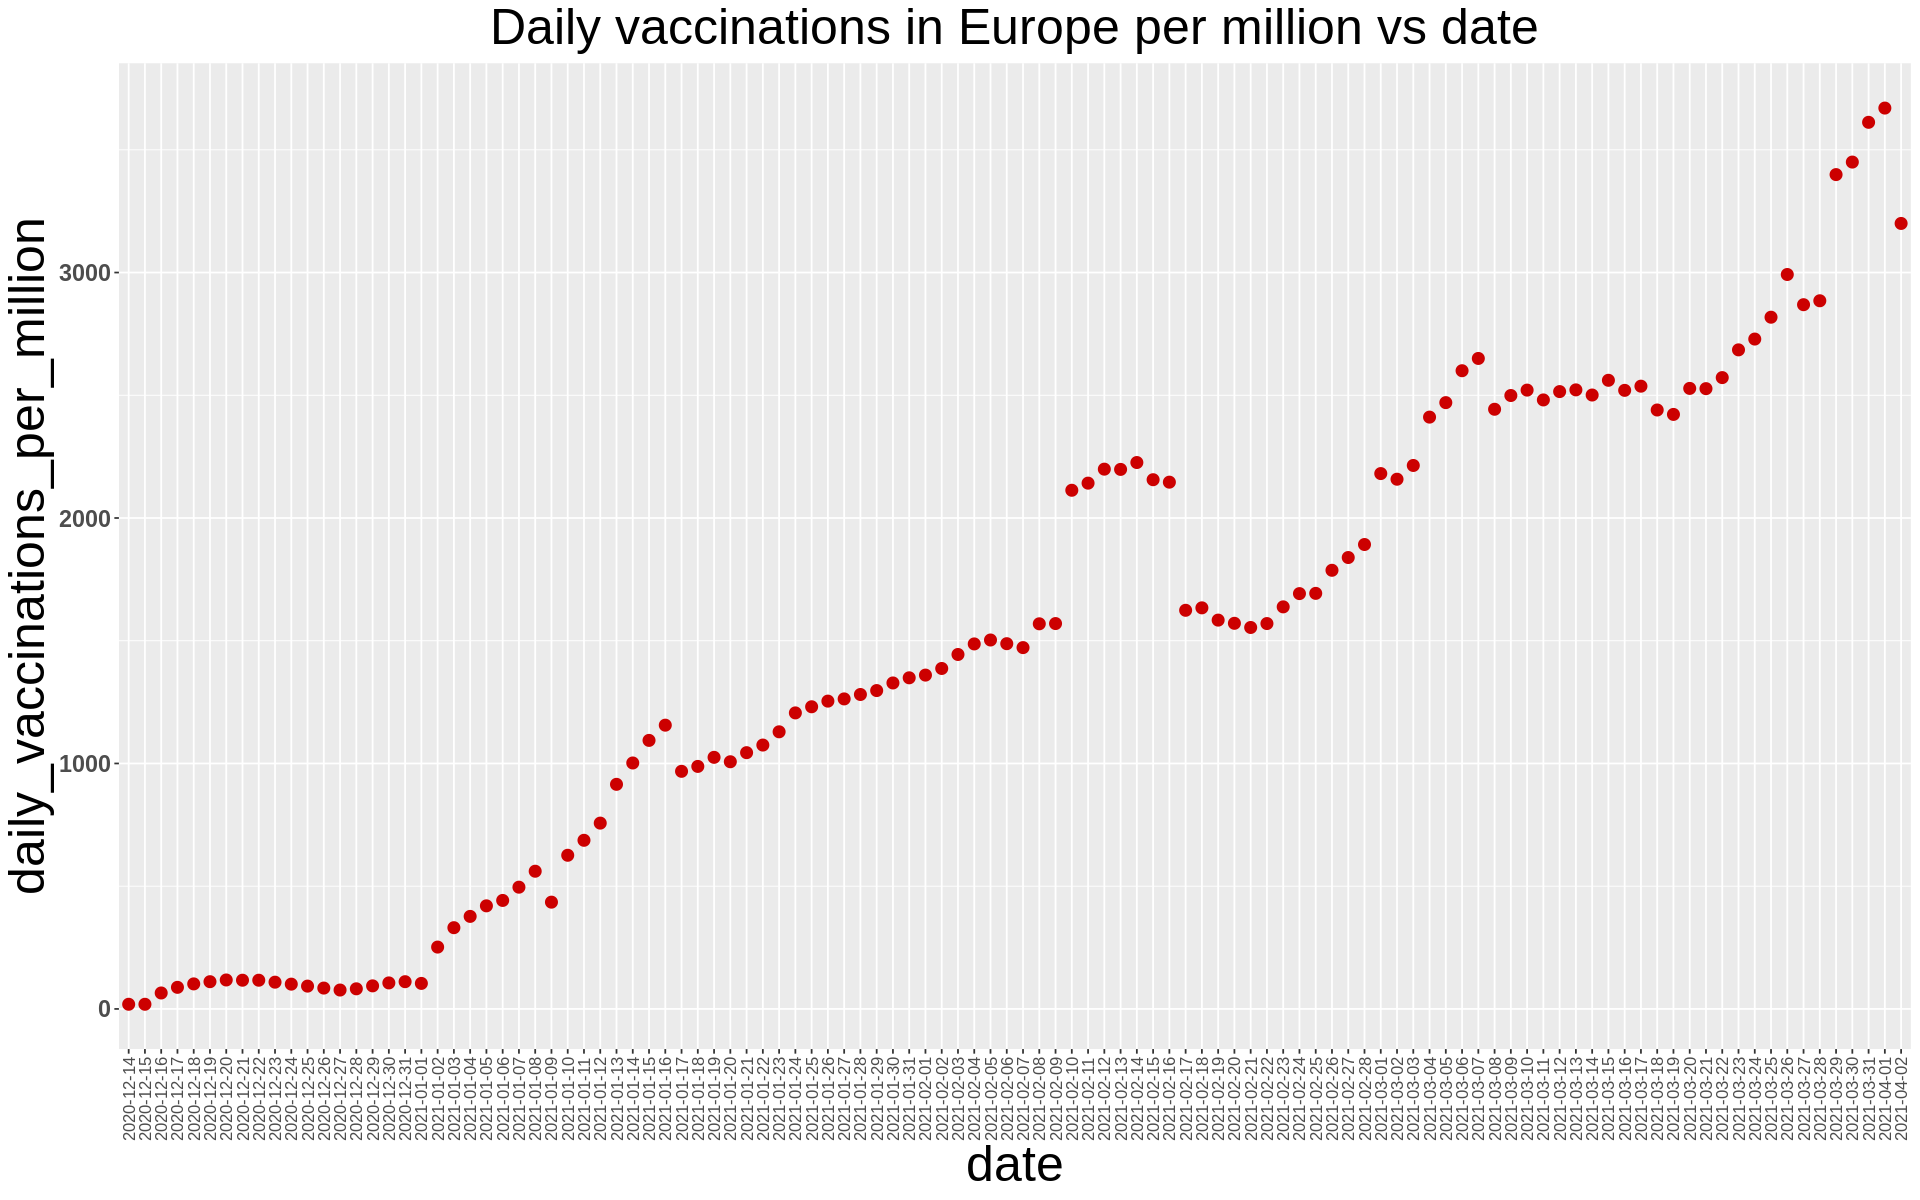

In [41]:
options(repr.plot.width = 16, repr.plot.height = 10)
plt <- ggplot(data=(vacctoteu),aes(x=date,y=daily_vaccinations_per_million))+geom_point(colour="#CC0000",size=3)+ggtitle("Daily vaccinations in Europe per million vs date")
plt+theme(plot.title= element_text(hjust=0.5,size=30),
          axis.title.x = element_text(size=30),
            axis.title.y = element_text(size=30),
         axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=0.5, size=10),
          axis.text.y = element_text(face="bold", 
                           size=14),legend.text = element_text(size = 12, face = "bold"),legend.title = element_text(size=15,face="bold"))

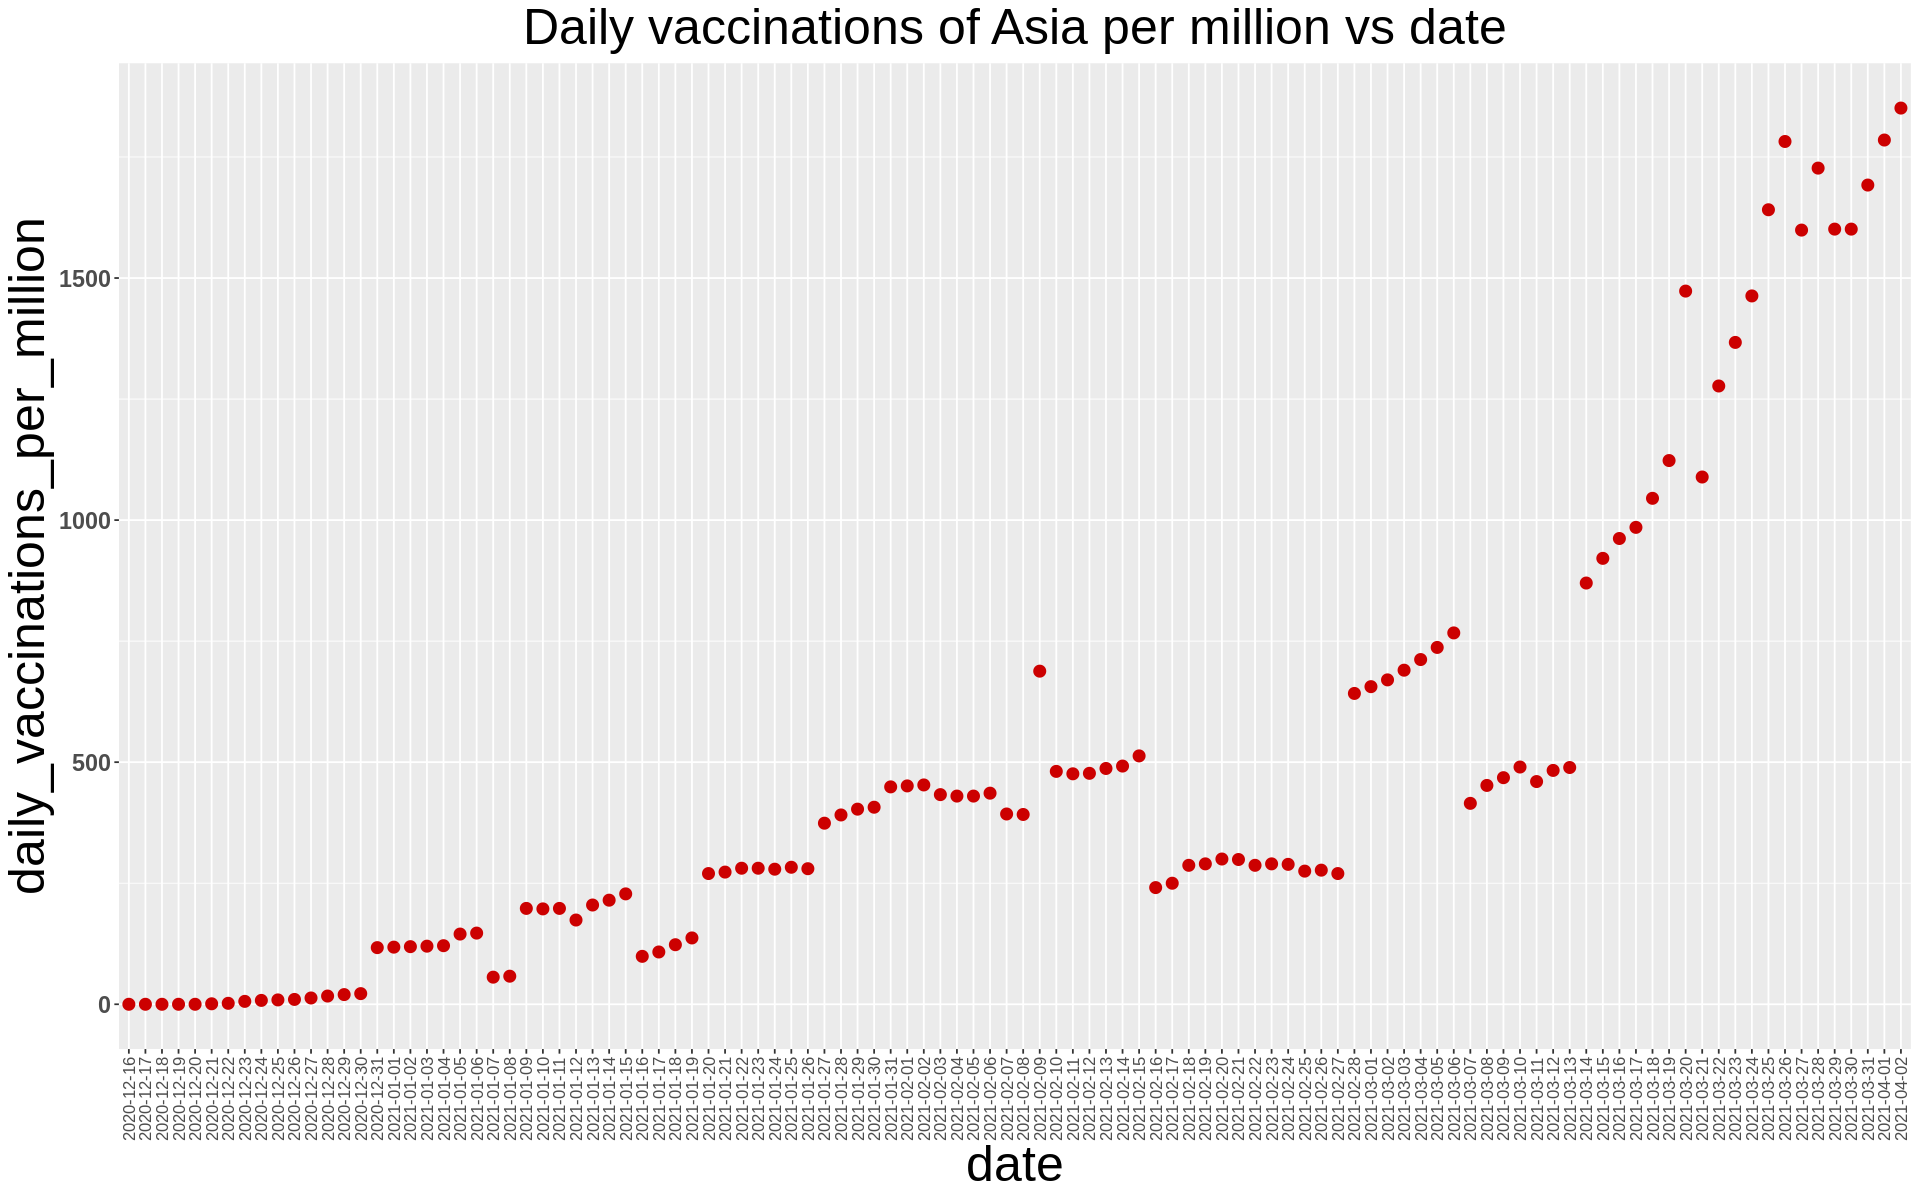

In [42]:
vacctotas <- filter(vacctot,vacctot$location=="Asia")
vacctotas <- vacctotas[-1:-1,]

options(repr.plot.width = 16, repr.plot.height = 10)
plt <- ggplot(data=(vacctotas),aes(x=date,y=daily_vaccinations_per_million))+geom_point(colour="#CC0000",size=3)+ggtitle("Daily vaccinations of Asia per million vs date")
plt+theme(plot.title= element_text(hjust=0.5,size=30),
          axis.title.x = element_text(size=30),
            axis.title.y = element_text(size=30),
         axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=0.5, size=10),
          axis.text.y = element_text(face="bold", 
                           size=14),legend.text = element_text(size = 12, face = "bold"),legend.title = element_text(size=15,face="bold"))


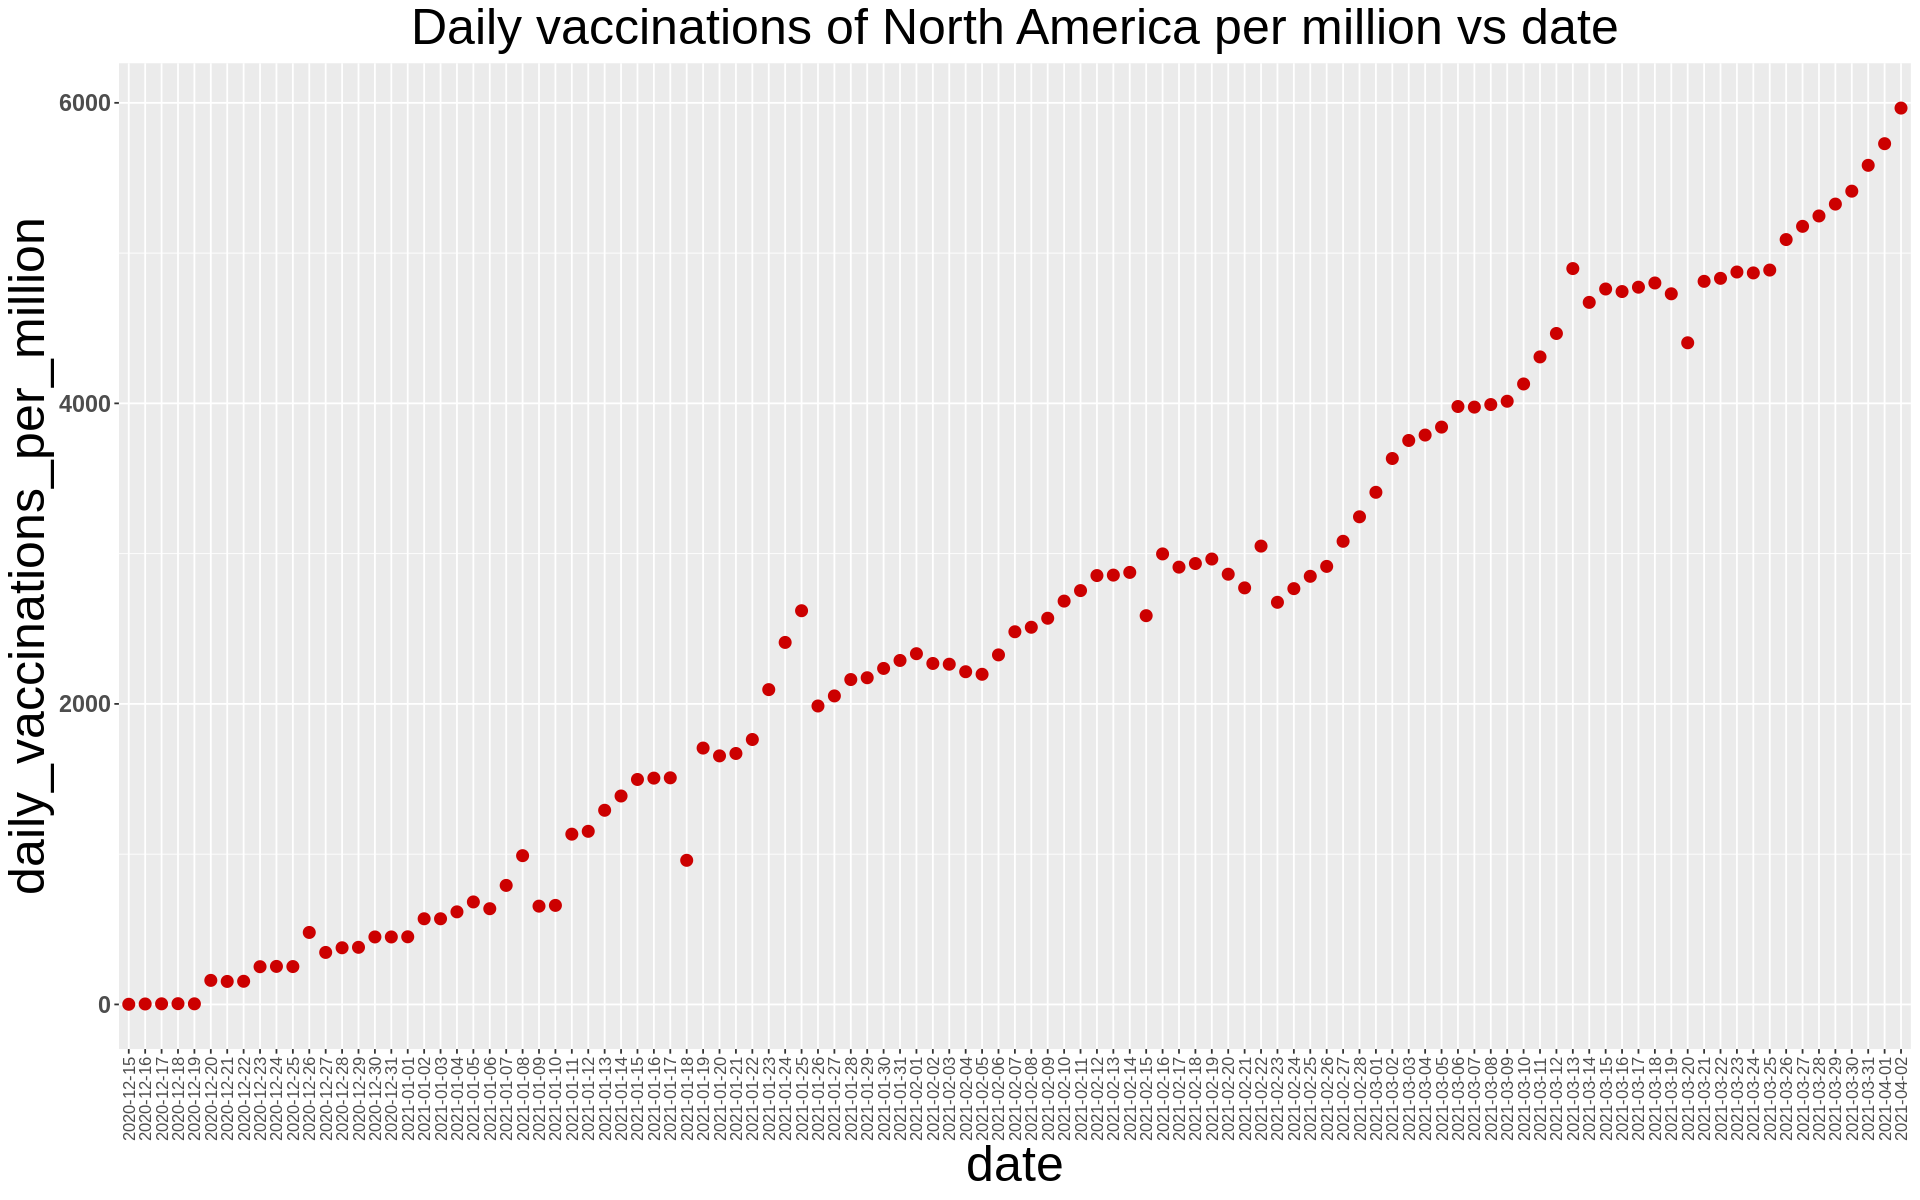

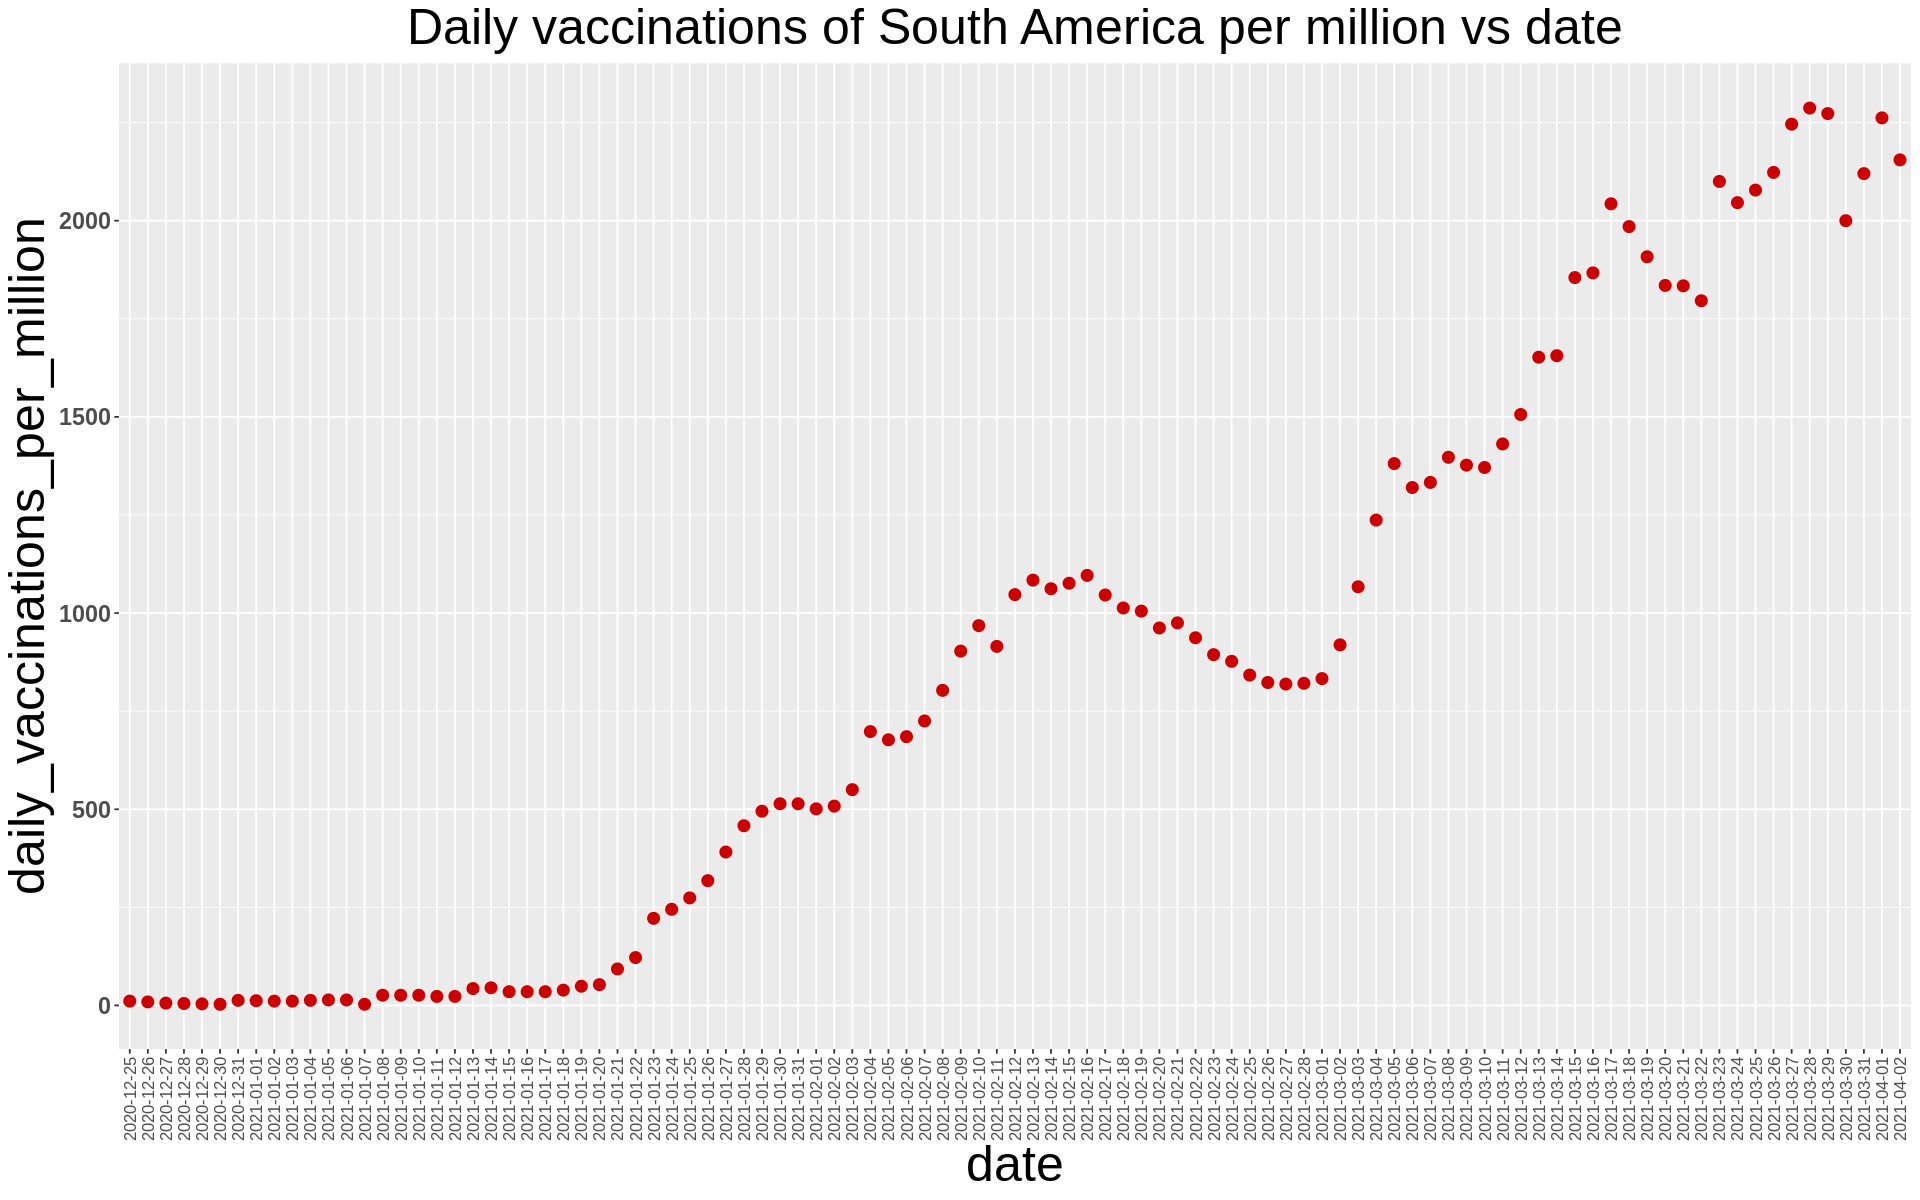

In [43]:
vacctotNA <- filter(vacctot,vacctot$location=="North America")
vacctotNA <- vacctotNA[-1:-1,]
options(repr.plot.width = 16, repr.plot.height = 10)
plt <- ggplot(data=(vacctotNA),aes(x=date,y=daily_vaccinations_per_million))+geom_point(colour="#CC0000",size=3)+ggtitle("Daily vaccinations of North America per million vs date")
plt+theme(plot.title= element_text(hjust=0.5,size=30),
          axis.title.x = element_text(size=30),
            axis.title.y = element_text(size=30),
         axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=0.5, size=10),
          axis.text.y = element_text(face="bold", 
                           size=14),legend.text = element_text(size = 12, face = "bold"),legend.title = element_text(size=15,face="bold"))

vacctotSA <- filter(vacctot,vacctot$location=="South America")
vacctotSA <- vacctotSA[-1:-1,]
options(repr.plot.width = 16, repr.plot.height = 10)
plt <- ggplot(data=(vacctotSA),aes(x=date,y=daily_vaccinations_per_million))+geom_point(colour="#CC0000",size=3)+ggtitle("Daily vaccinations of South America per million vs date")
plt+theme(plot.title= element_text(hjust=0.5,size=30),
          axis.title.x = element_text(size=30),
            axis.title.y = element_text(size=30),
         axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=0.5, size=10),
          axis.text.y = element_text(face="bold", 
                           size=14),legend.text = element_text(size = 12, face = "bold"),legend.title = element_text(size=15,face="bold"))


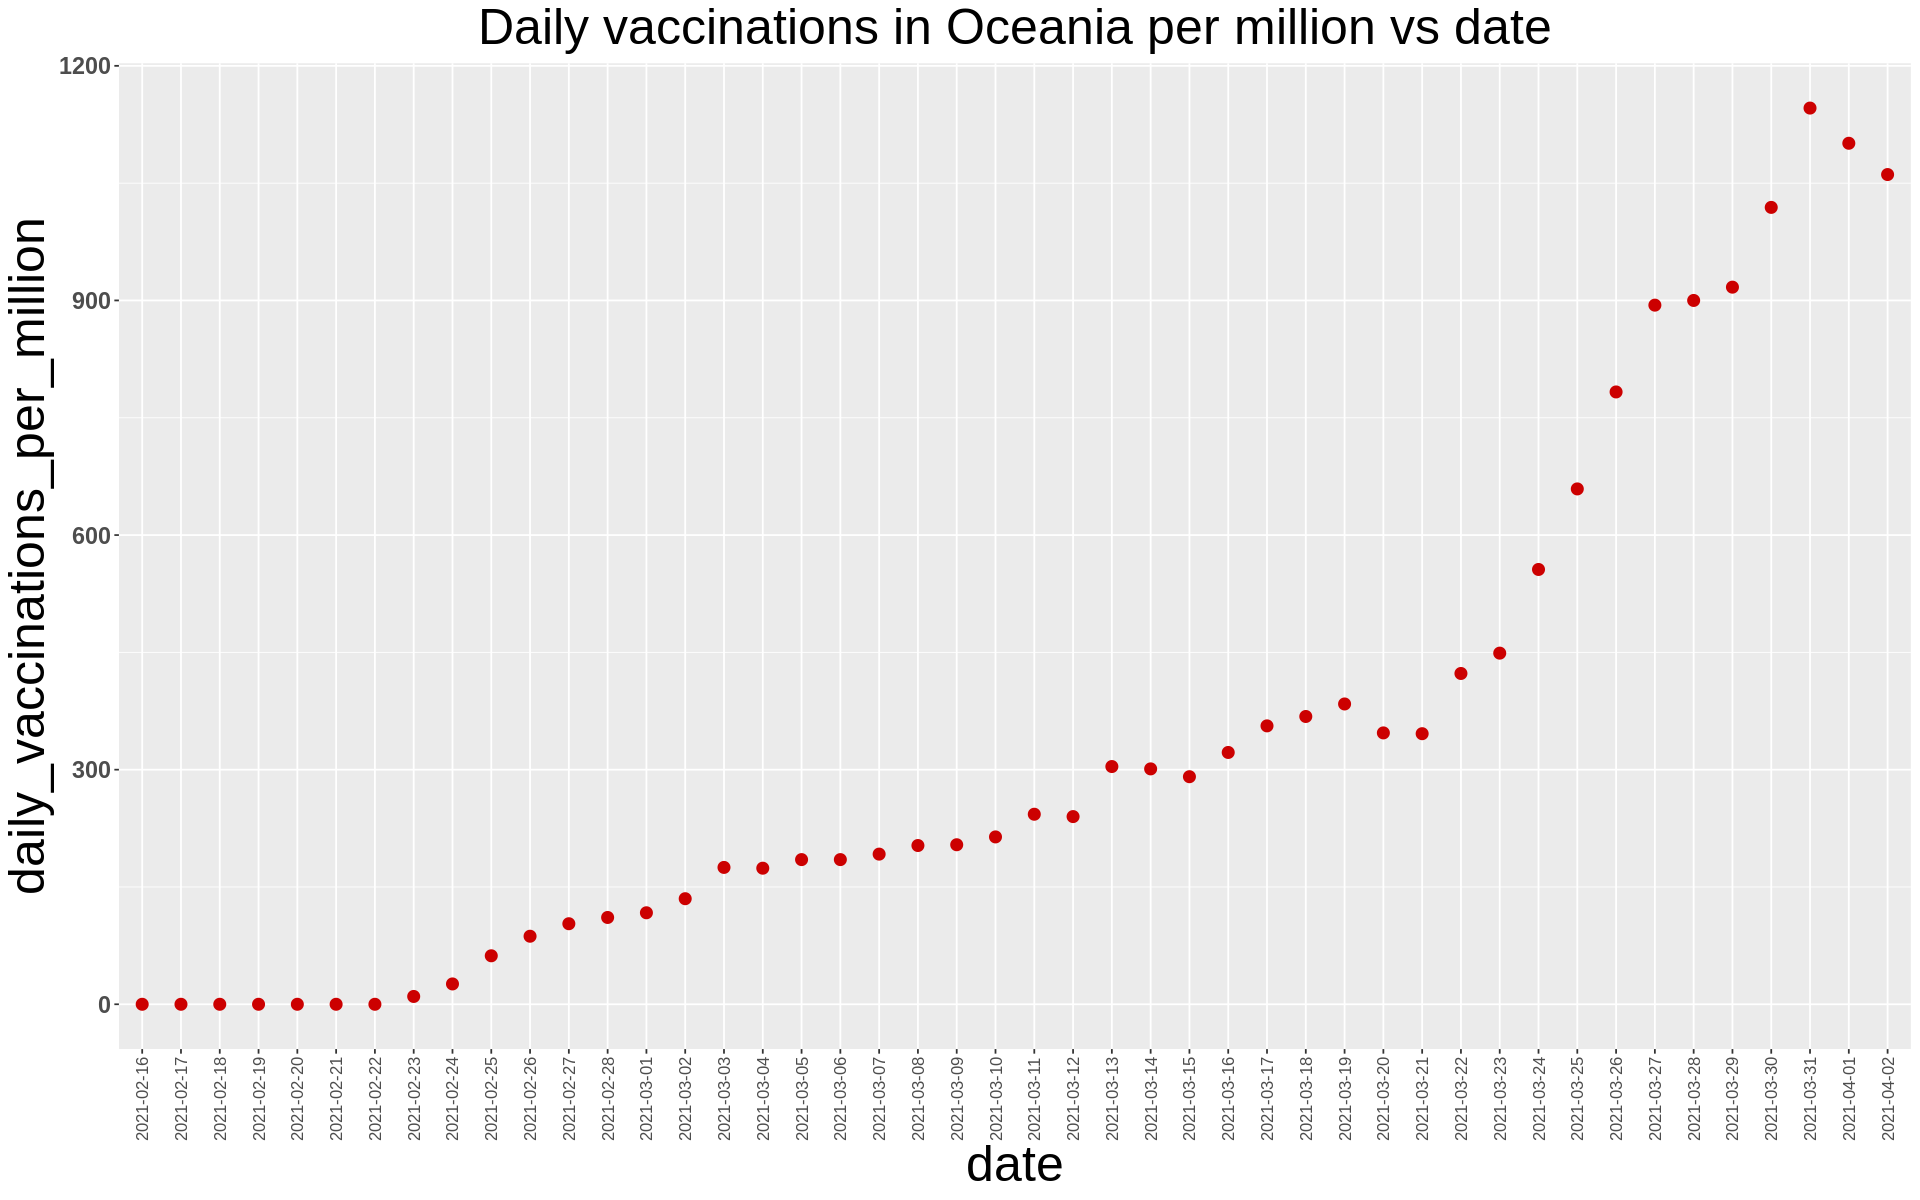

In [8]:
vacctotNA <- filter(vacctot,vacctot$location=="Oceania")
vacctotNA <- vacctotNA[-1:-1,]
options(repr.plot.width = 16, repr.plot.height = 10)
plt <- ggplot(data=(vacctotNA),aes(x=date,y=daily_vaccinations_per_million))+geom_point(colour="#CC0000",size=3)+ggtitle("Daily vaccinations in Oceania per million vs date")
plt+theme(plot.title= element_text(hjust=0.5,size=30),
          axis.title.x = element_text(size=30),
            axis.title.y = element_text(size=30),
         axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=0.5, size=10),
          axis.text.y = element_text(face="bold", 
                           size=14),legend.text = element_text(size = 12, face = "bold"),legend.title = element_text(size=15,face="bold"))


In [6]:
vacctotNA <- filter(vacctot,vacctot$location=="Oceania")
vacctotNA <- vacctotNA[-1:-1,]
options(repr.plot.width = 16, repr.plot.height = 10)
plt <- ggplot(data=(vacctotNA),aes(x=date,y=daily_vaccinations_per_million))+geom_point(colour="#CC0000",size=3)+ggtitle("Daily vaccinations in Oceania per million vs date")
plt+theme(plot.title= element_text(hjust=0.5,size=30),
          axis.title.x = element_text(size=30),
            axis.title.y = element_text(size=30),
         axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=0.5, size=10),
          axis.text.y = element_text(face="bold", 
                           size=14),legend.text = element_text(size = 12, face = "bold"),legend.title = element_text(size=15,face="bold"))


location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
